In [ ]:
#Recurrence Plot Analysis
#Correlation Dimension
#Lyapunov Exponent
#Entropy Measures
#Machine Learning Algorithms (e.g. Random Forest, SVM, Neural Networks, etc.)
#Autoregressive Models
#Fourier Analysis
#Wavelet Analysis
#Fractal Dimension Analysis
#Dynamic Time Warping


In [1]:
#imports and classes
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [6]:
#data production
#going to use a common dataset for testing all algos below for now
#soon we'll talk about using ODEint to create data numerically
# Example time series data
NL = np.random.randn(100)
L = np.linspace(0, 10, 100)
t = np.arange(0,100,1)

In [7]:
t

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

<function matplotlib.pyplot.show(close=None, block=None)>

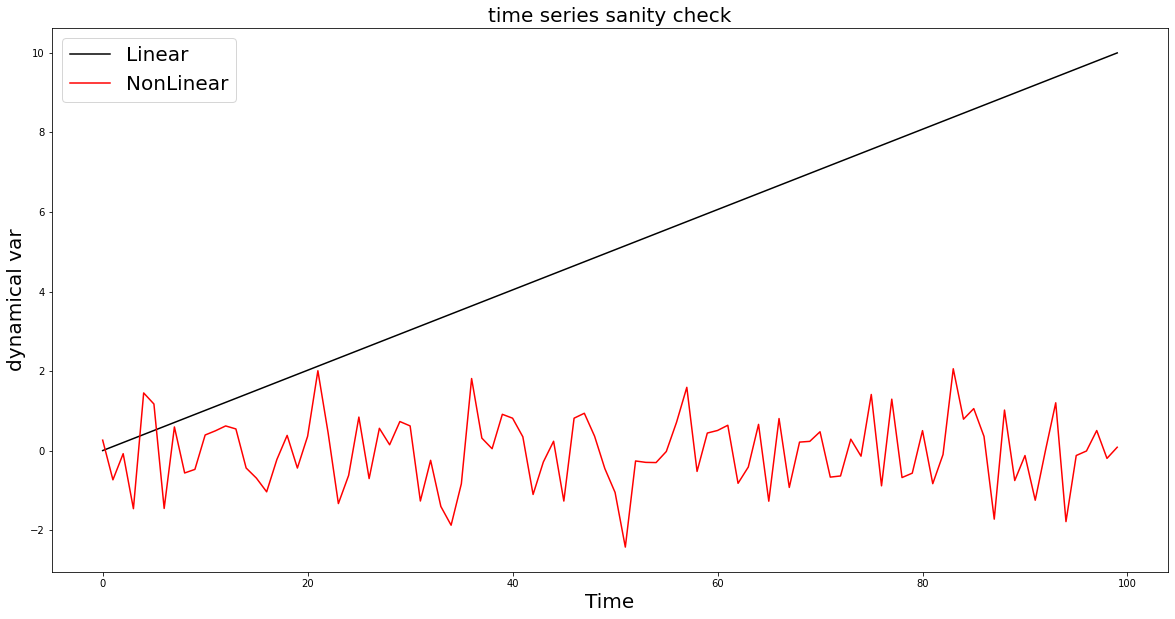

In [8]:
#plot data to see if it seems sensible for our purposes
plt.figure(figsize=(20,10))
plt.plot(t,L,label = 'Linear', color = 'black')
plt.plot(t,NL,label = 'NonLinear', color = 'r')
plt.xlabel('Time',fontsize=20)
plt.ylabel('dynamical var',fontsize=20)
plt.legend(fontsize=20)
plt.title('time series sanity check',fontsize=20)
plt.show

In [9]:
#looks like the ChatGPT took 'linear' too literally and produces a simple linear time series, rather than a time series derived from a 
#linear dynamical system
#let me try to use odeint or something to integrate a series out
def lin(x, t, A):
    X = x
    dXdt = [A*X]
    return dXdt

In [25]:
a = (2)
x0 = (1)
tTest = np.linspace(0, 10, 101)

TypeError: 'int' object is not iterable

In [26]:
sol = odeint(lin, x0, tTest, args=(a))

error: Extra arguments must be in a tuple.

In [ ]:
#having trouble with typecasting of int into tupple for odeint, just gonna use textbook example

In [31]:
def pend(y, t, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt

In [32]:
b = 0.25
c = 5.0

In [33]:
y0 = [np.pi - 0.1, 0.0]

In [34]:
t = np.linspace(0, 10, 101)

In [35]:
sol = odeint(pend, y0, t, args=(b, c))

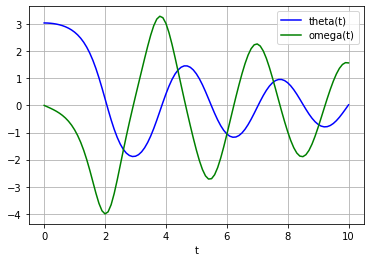

In [36]:
plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.plot(t, sol[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

In [37]:
#now going to remove nonlinearity by setting coefficient on trig term to 0
b = 0.25
c = 0

In [38]:
sol2 = odeint(pend, y0, t, args=(b, c))

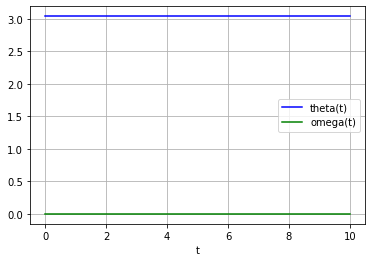

In [39]:
plt.plot(t, sol2[:, 0], 'b', label='theta(t)')
plt.plot(t, sol2[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

In [2]:
#kinda boring so maybe try a more interesting system while retaining linear relationships
def generalized2D(X, t, a, b, c, d):
    x,y = X
    dXdt = [a*x + b*y, c*x + d*y]
    return dXdt

In [8]:
a=1
b=-1
c=1
d=1

In [4]:
X0 = [1,1]

In [32]:
t = np.linspace(0, 10, 100)

In [33]:
t

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

In [34]:
sol3 = odeint(generalized2D, X0, t, args=(a,b,c,d))

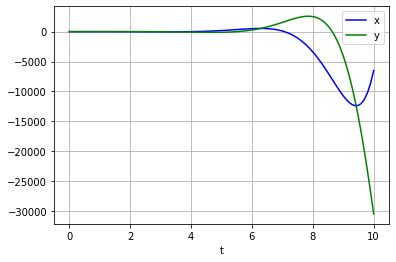

In [35]:
plt.plot(t, sol3[:, 0], 'b', label='x')
plt.plot(t, sol3[:, 1], 'g', label='y')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

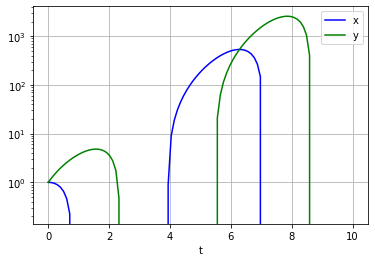

In [36]:
#also want to try a log plot since it might make a bit more sense given growth characteristics can blow up solutions
plt.plot(t, sol3[:, 0], 'b', label='x')
plt.plot(t, sol3[:, 1], 'g', label='y')
plt.yscale(value = "log")
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

In [11]:
#linear system looks ok 
#now gonna try to use odeint for nonlinear system, so just have some terms which involve either x^2, y^2 or xy for 2d dynamical system
def NL2D(X, t, a, b, c, d):
    x,y = X
    dXdt = [a*x + b*y, c*x + d*x*y]
    return dXdt

In [12]:
a=1
b=-1
c=1
d=1

In [37]:
X0 = [1,1]
t = np.linspace(0, 10, 100)

In [38]:
len(t)

100

In [39]:
sol4 = odeint(NL2D, X0, t, args=(a,b,c,d))

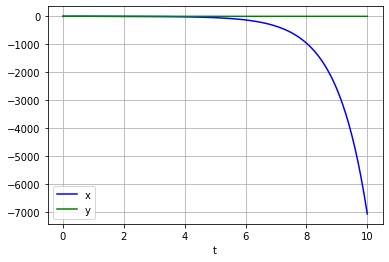

In [40]:
plt.plot(t, sol4[:, 0], 'b', label='x')
plt.plot(t, sol4[:, 1], 'g', label='y')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

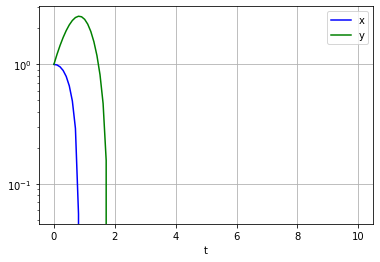

In [41]:
plt.plot(t, sol4[:, 0], 'b', label='x')
plt.plot(t, sol4[:, 1], 'g', label='y')
plt.yscale(value = "log")
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

In [49]:
sol3

array([[ 1.00000000e+00,  1.00000000e+00],
       [ 9.89092571e-01,  1.21220518e+00],
       [ 9.53414476e-01,  1.44455175e+00],
       [ 8.88225690e-01,  1.69630367e+00],
       [ 7.88391217e-01,  1.96612188e+00],
       [ 6.48408621e-01,  2.25195982e+00],
       [ 4.62449857e-01,  2.55095110e+00],
       [ 2.24420212e-01,  2.85929064e+00],
       [-7.19640769e-02,  3.17211048e+00],
       [-4.33076135e-01,  3.48335176e+00],
       [-8.65254641e-01,  3.78563478e+00],
       [-1.37465300e+00,  4.07013001e+00],
       [-1.96705896e+00,  4.32643276e+00],
       [-2.64768210e+00,  4.54244547e+00],
       [-3.42090676e+00,  4.70427180e+00],
       [-4.29000837e+00,  4.79612768e+00],
       [-5.25683116e+00,  4.80027499e+00],
       [-6.32142624e+00,  4.69698449e+00],
       [-7.48164890e+00,  4.46453560e+00],
       [-8.73271552e+00,  4.07926085e+00],
       [-1.00667207e+01,  3.51564425e+00],
       [-1.14721171e+01,  2.74648358e+00],
       [-1.29331602e+01,  1.74312693e+00],
       [-1.

In [51]:
sol3[:,1]

array([ 1.00000000e+00,  1.21220518e+00,  1.44455175e+00,  1.69630367e+00,
        1.96612188e+00,  2.25195982e+00,  2.55095110e+00,  2.85929064e+00,
        3.17211048e+00,  3.48335176e+00,  3.78563478e+00,  4.07013001e+00,
        4.32643276e+00,  4.54244547e+00,  4.70427180e+00,  4.79612768e+00,
        4.80027499e+00,  4.69698449e+00,  4.46453560e+00,  4.07926085e+00,
        3.51564425e+00,  2.74648358e+00,  1.74312693e+00,  4.75794974e-01,
       -1.08599912e+00, -2.97291990e+00, -5.21515711e+00, -7.84163791e+00,
       -1.08790911e+01, -1.43509518e+01, -1.82760945e+01, -2.26673868e+01,
       -2.75300533e+01, -3.28598472e+01, -3.86410253e+01, -4.48441302e+01,
       -5.14235848e+01, -5.83151120e+01, -6.54330004e+01, -7.26672395e+01,
       -7.98805643e+01, -8.69054516e+01, -9.35411285e+01, -9.95506611e+01,
       -1.04658207e+02, -1.08546535e+02, -1.10854914e+02, -1.11177526e+02,
       -1.09062530e+02, -1.04011956e+02, -9.54826256e+01, -8.28882902e+01,
       -6.56032224e+01, -

In [46]:
len(sol3)
len(sol4)
sol3[10]

array([-0.86525464,  3.78563478])

In [48]:
sol3.shape()

TypeError: 'tuple' object is not callable

In [ ]:
#
#
#
#
#
#
#
#main

In [2]:
#imports and classes
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sklearn.preprocessing import StandardScaler

In [2]:
#produce linear data
def generalized2D(X, t, a, b, c, d):
    x,y = X
    dXdt = [a*x + b*y, c*x + d*y]
    return dXdt

a=1
b=-1
c=1
d=1

X0 = [1,1]

t = np.linspace(0, 10, 1000)

sol3 = odeint(generalized2D, X0, t, args=(a,b,c,d))


#produce nonlinear
def NL2D(X, t, a, b, c, d):
    x,y = X
    dXdt = [a*x + b*y, c*x + d*x*y]
    return dXdt

a=1
b=-1
c=1
d=1

X0 = [1,1]
t = np.linspace(0, 10, 1000)

sol4 = odeint(NL2D, X0, t, args=(a,b,c,d))

In [3]:
print(len(sol3))
print(len(sol4))

1000
1000


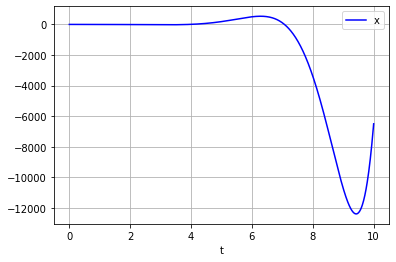

In [4]:
plt.plot(t, sol3[:, 0], 'b', label='x')
#plt.plot(t, sol3[:, 1], 'g', label='y')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

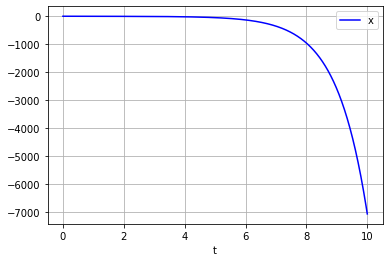

In [5]:
plt.plot(t, sol4[:, 0], 'b', label='x')
#plt.plot(t, sol3[:, 1], 'g', label='y')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

In [6]:
#define data vectors, concatenate, rescale/normalize, split trainm/test
# Example time series data
nonlinear_data = sol4[:,1]#np.random.randn(100)
linear_data = sol3[:,1]#np.linspace(0, 10, 100)

# Combine the data into a single array
data = np.concatenate([nonlinear_data, linear_data])

# Scale the data to have zero mean and unit variance
scaler = StandardScaler()
data = scaler.fit_transform(data.reshape(-1, 1))

# Labels for each time series
labels = np.concatenate([np.zeros(1000), np.ones(1000)])

# Split the data into training and testing sets
train_data = data[:150]
train_labels = labels[:150]

test_data = data[150:]
test_labels = labels[150:]

In [7]:
#here is a block meant for partitioning data into ordered sets so rather than training model on 'this point is linear,
#this other point is nonlinear" we would ideally train it based on "This set of ordered points is linear system
#not sure if this step is necessary, but to me it seems the classification algos typically have 
#point-wise classification which can be problematic
#we want classifier to focus on relationship between points, not points themselves
#hence build 'objects' to be classified as ordered vectors
nonlinear_data = sol4[:,1]
linear_data = sol3[:,1]
splitNum = 40
objSize = int(len(nonlinear_data)/splitNum)
shape = (objSize, splitNum) #row dimension is length 25 so 25 points per column, 40 'examples'
NLarr = np.empty(shape, dtype=float)
Larr = np.empty(shape, dtype=float)
for i in range(splitNum):
    NLarr[:,(splitNum-1)] = nonlinear_data[i*objSize: (i*objSize+objSize)]
    



In [8]:
nonlinear_data

array([ 1.        ,  1.02011986,  1.04043802,  1.06095207,  1.08165944,
        1.10255732,  1.12364262,  1.14491199,  1.16636181,  1.18798816,
        1.20978686,  1.23175343,  1.25388307,  1.27617067,  1.2986108 ,
        1.32119771,  1.34392527,  1.36678705,  1.38977627,  1.41288574,
        1.43610793,  1.45943491,  1.48285839,  1.50636969,  1.52995972,
        1.553619  ,  1.57733764,  1.60110536,  1.62491142,  1.64874471,
        1.67259369,  1.69644636,  1.72029035,  1.74411285,  1.7679006 ,
        1.79163995,  1.81531684,  1.83891676,  1.86242481,  1.88582569,
        1.90910369,  1.93224271,  1.95522626,  1.97803751,  2.00065923,
        2.02307385,  2.04526348,  2.0672099 ,  2.08889457,  2.1102987 ,
        2.1314032 ,  2.15218875,  2.17263579,  2.19272457,  2.21243518,
        2.23174749,  2.25064133,  2.26909638,  2.28709226,  2.30460857,
        2.32162489,  2.33812082,  2.35407606,  2.3694704 ,  2.38428371,
        2.39849608,  2.41208781,  2.42503941,  2.43733171,  2.44

In [ ]:
##possible modifications
#
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#data = scaler.fit_transform(data.reshape(-1, 1))
#
#
#
#
#
#
#
#
#
#
#
#

In [5]:
# ML SVM

from sklearn.svm import SVC

# Train a support vector machine (SVM) classifier on the training data
clf = SVC(kernel='linear')
clf.fit(train_data, train_labels)

# Evaluate the classifier on the test data
accuracy = clf.score(test_data, test_labels)
print("Accuracy:", accuracy)


Accuracy: 0.12


In [6]:
# ML random forest

#import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Train a random forest classifier on the training data
clf = RandomForestClassifier()
clf.fit(train_data, train_labels)

# Evaluate the classifier on the test data
accuracy = clf.score(test_data, test_labels)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [7]:
#Recurrence Plot Analysis

import numpy as np
import matplotlib.pyplot as plt

def classify_ts(ts):
    # Compute the recurrence plot of the time series
    N = len(ts)
    R = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            if np.abs(ts[i] - ts[j]) < 0.01:
                R[i, j] = 1
    
    # Count the number of diagonal lines in the recurrence plot
    count = 0
    for i in range(N):
        for j in range(N):
            if R[i, j] == 1 and R[(i+1)%N, (j+1)%N] == 1:
                count += 1
    
    # If the number of diagonal lines is high, then the time series is considered nonlinear
    if count > 0.1 * N**2:
        return "nonlinear"
    else:
        return "linear"

# Example usage:
ts = np.random.randn(100)  # Generate a random time series
classification = classify_ts(ts)
print("Classification:", classification)

# Plot the recurrence plot
plt.imshow(R, cmap='binary')
plt.show()


Classification: linear


NameError: name 'R' is not defined

C:\Users\lukef\AppData\Local\Temp\ipykernel_9012\501541142.py:20: RuntimeWarning: divide by zero encountered in log
  fit = np.polyfit(np.log(dists), np.log(C), 1)


Classification: nonlinear


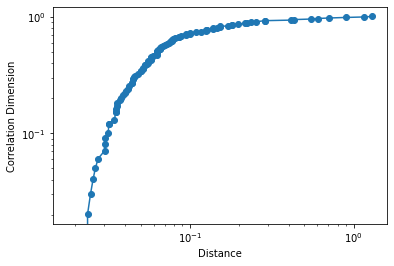

In [8]:
#Correlation Dimension

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

def classify_ts(ts):
    # Compute the correlation dimension of the time series
    N = len(ts)
    nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(ts.reshape(-1, 1))
    distances, _ = nbrs.kneighbors(ts.reshape(-1, 1))
    dists = distances[:, -1]
    dists = np.sort(dists)
    C = np.zeros(N)
    for i in range(1, N):
        C[i] = np.sum(dists <= dists[i]) / (N - 1)
    plt.plot(dists, C, 'o-')
    
    # Fit a line to the computed correlation dimension curve
    fit = np.polyfit(np.log(dists), np.log(C), 1)
    slope = fit[0]
    
    # If the slope of the line is close to 2, then the time series is considered linear
    if abs(slope - 2) < 0.1:
        return "linear"
    else:
        return "nonlinear"

# Example usage:
ts = np.random.randn(100)  # Generate a random time series
classification = classify_ts(ts)
print("Classification:", classification)

# Plot the correlation dimension curve
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Distance')
plt.ylabel('Correlation Dimension')
plt.show()


In [9]:
#Lyapunov Exponent

import numpy as np
import matplotlib.pyplot as plt

def classify_ts(ts):
    # Compute the lyapunov exponent of the time series
    N = len(ts)
    eps = 0.01
    max_steps = int(np.log(N) / np.log(1 / eps))
    x0 = ts[0]
    x = x0 + eps
    lyap = 0
    for i in range(max_steps):
        x = ts[int(x)]
        delta = np.abs(x - x0)
        if delta > eps:
            lyap = i / np.log(delta / eps)
            break
    # If the lyapunov exponent is positive, then the time series is considered nonlinear
    if lyap > 0:
        return "nonlinear"
    else:
        return "linear"

# Example usage:
ts = np.random.randn(100)  # Generate a random time series
classification = classify_ts(ts)
print("Classification:", classification)


Classification: linear


In [10]:
#Entropy Measures

import numpy as np
import scipy.stats as stats

def classify_ts(ts):
    # Compute the entropy of the time series
    entropy = stats.entropy(ts)
    # If the entropy is high, then the time series is considered nonlinear
    if entropy > 2.0:
        return "nonlinear"
    else:
        return "linear"

# Example usage:
ts = np.random.randn(100)  # Generate a random time series
classification = classify_ts(ts)
print("Classification:", classification)


Classification: linear


In [11]:
#Fractal Dimension Analysis

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

def classify_ts(ts):
    # Compute the nearest neighbors of each point in the time series
    nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(ts.reshape(-1, 1))
    distances, indices = nbrs.kneighbors(ts.reshape(-1, 1))
    # Compute the average nearest neighbor distance for different values of epsilon
    epsilons = np.linspace(0, 1, 100)
    avg_nn_dists = []
    for eps in epsilons:
        avg_nn_dists.append(np.mean(distances[:, 1][distances[:, 1] < eps]))
    # Fit a power law to the average nearest neighbor distance vs. epsilon
    log_avg_nn_dists = np.log(avg_nn_dists)
    log_epsilons = np.log(epsilons)
    fit = np.polyfit(log_epsilons, log_avg_nn_dists, 1)
    # Plot the average nearest neighbor distance vs. epsilon
    plt.plot(epsilons, avg_nn_dists, 'bo')
    plt.plot(epsilons, np.exp(fit[1]) * epsilons**fit[0], 'r-')
    plt.show()
    # If the slope of the power law fit is close to 2, then the time series is considered linear
    if abs(fit[0] - 2) < 0.1:
        return "linear"
    else:
        return "nonlinear"

# Example usage:
ts = np.random.randn(100)  # Generate a random time series
classification = classify_ts(ts)
print("Classification:", classification)


c:\users\lukef\appdata\local\programs\python\python39\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\users\lukef\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\lukef\AppData\Local\Temp\ipykernel_9012\64888615.py:18: RuntimeWarning: divide by zero encountered in log
  log_epsilons = np.log(epsilons)
c:\users\lukef\appdata\local\programs\python\python39\lib\site-packages\numpy\lib\polynomial.py:667: RuntimeWarning: invalid value encountered in true_divide
  lhs /= scale


LinAlgError: SVD did not converge in Linear Least Squares

In [25]:
#Dynamic Time Warping
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import numpy as np
#from sklearn.metrics import dtw
import sklearn.metrics
from scipy.spatial.distance import euclidean

# Define time series data for a linear and a nonlinear dynamical system
lin_dyn_sys = np.array([1, 2, 3, 4, 5])
nonlin_dyn_sys = np.array([1, 3, 5, 8, 13])

# Define a new time series to be classified
test_series = np.array([1, 2, 3, 4, 6])

# Calculate the DTW distances between the test series and the linear and nonlinear systems
#lin_dyn_dist = dtw(lin_dyn_sys, test_series, dist=euclidean)
#nonlin_dyn_dist = dtw(nonlin_dyn_sys, test_series, dist=euclidean)
lin_dyn_dist = dtw.warping_path(lin_dyn_sys, test_series)
nonlin_dyn_dist = dtw.warping_path(nonlin_dyn_sys, test_series)

dtwvis.plot_warping(s1, s2, path)
distance = dtw.distance(s1, s2)

# Classify the test series based on which system it is closer to
#if lin_dyn_dist < nonlin_dyn_dist:
#    print("The test series is closer to a linear dynamical system.")
#else:
#    print("The test series is closer to a nonlinear dynamical system.")

    
#from dtaidistance import dtw
#from dtaidistance import dtw_visualisation as dtwvis
#import random
#import numpy as np
#x = np.arange(0, 20, .5)
#s1 = np.sin(x)
#s2 = np.sin(x - 1)
#path = dtw.warping_path(s1, s2)
#dtwvis.plot_warping(s1, s2, path)
#distance = dtw.distance(s1, s2)

TypeError: 'module' object is not callable

In [ ]:
#linear regression w/ weights from poly terms, Lawson suggestion

In [ ]:
##### ideas to further develop
#lots of train/test data: 2d linear system with many series produced from parameter perturbations
#nonlinear system data by not only varying parameters in nonlinear systems but also diff types of dynamics

#real world data or from benchmark systems such as Lorenz '63, colpitts

#ensemble of all classifiers

#mixing training and test data: current setup seems to concatentate time series points in large blocks, might want to do some mixing so we take 
##series produced and systematically interweave them 

#system memory, don't want systems that train on single points in phase space, rather inherently assign the training object as a set of 
##time ordered points, with the classification 'this set of ordered points in phase space is from nonlinear system'
##rather than classification 'this point came from a nonlinear system'.....obviously ignorant of time ordering in this case if I'm not mistaken

#

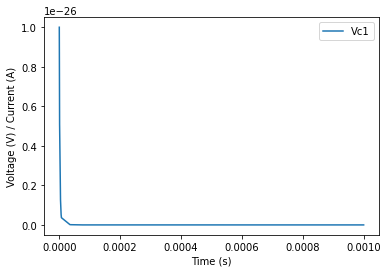

In [110]:
#colpitts oscillator model
import numpy as np
import matplotlib.pyplot as plt

def colpitts_oscillator(x, t, R1, R2, C1, C2, L, beta):
    vc1, ic1, vc2, ic2 = x
    di1dt = (vc1 - R1 * ic1) / L
    dvc1dt = -ic1 / C1
    di2dt = (vc2 - R2 * ic2) / L
    dvc2dt = (ic1 - ic2) / C2
    return [dvc1dt, di1dt, dvc2dt, di2dt]

R1 = 1e3
R2 = 2e3
C1 = 1e-9
C2 = 2e-9
L = 1e-6
beta = 100

t = np.linspace(0, 0.001, 1000)
x0 = [1.0E-26, 1.0E-29, 1.0E-13, 1.0E-16]

sol = odeint(colpitts_oscillator, x0, t, args=(R1, R2, C1, C2, L, beta))

plt.plot(t, sol[:, 0], label='Vc1')
#plt.plot(t, sol[:, 1], label='Ic1')
#plt.plot(t, sol[:, 2], label='Vc2')
#plt.plot(t, sol[:, 3], label='Ic2')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V) / Current (A)')
plt.show()


In [15]:
sol

array([[1.00000000e-26, 1.00000000e-29, 1.00000000e-13, 1.00000000e-16],
       [5.10252622e-27, 5.10763898e-30, 8.10773109e-14, 4.05437240e-17],
       [3.65160526e-27, 3.65526419e-30, 6.86311650e-14, 3.43198730e-17],
       ...,
       [4.41622935e-36, 4.42065444e-39, 7.10649468e-20, 3.55364856e-23],
       [4.41447327e-36, 4.41889660e-39, 7.10367221e-20, 3.55223716e-23],
       [4.41271719e-36, 4.41713875e-39, 7.10084974e-20, 3.55082576e-23]])

In [13]:
x = 1.0E-19
print(x)

1e-19


In [9]:
#lorenz 96 model setup
def lorenz96(x, t, N, F):
    dxdt = np.zeros(N)
    for i in range(N):
        dxdt[i] = (x[(i+1)%N] - x[(i-2)%N]) * x[(i-1)%N] - x[i] + F
    return dxdt


In [ ]:
#lorenz 96 model params
#Choose the number of variables (N), the forcing constant (F), and the initial condition (x0).


In [10]:
#lorenz 96 model solution
from scipy.integrate import solve_ivp

N = 4
F = 8
x0 = F * np.ones(N) + np.random.randn(N)

t_eval = np.linspace(0, 10, 1000)
sol = solve_ivp(lambda t, x: lorenz96(x, t, N, F), [0, 10], x0, t_eval=t_eval)


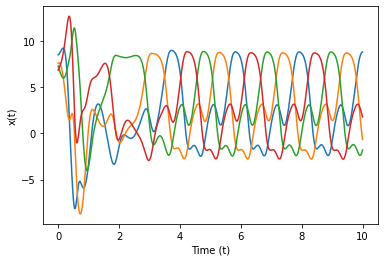

In [11]:
#lorenz 96 plot
import matplotlib.pyplot as plt

for i in range(N):
    plt.plot(sol.t, sol.y[i,:])

plt.xlabel('Time (t)')
plt.ylabel('x(t)')
plt.show()


In [12]:
#Lyapunov Exponent

#import numpy as np
#import matplotlib.pyplot as plt

def classify_ts(ts):
    # Compute the lyapunov exponent of the time series
    N = len(ts)
    eps = 0.01
    max_steps = int(np.log(N) / np.log(1 / eps))
    x0 = ts[0]
    x = x0 + eps
    lyap = 0
    for i in range(max_steps):
        x = ts[int(x)]
        delta = np.abs(x - x0)
        if delta > eps:
            lyap = i / np.log(delta / eps)
            break
    # If the lyapunov exponent is positive, then the time series is considered nonlinear
    if lyap > 0:
        return "nonlinear"
    else:
        return "linear"




In [13]:
# Example usage:
#ts = np.random.randn(100)  # Generate a random time series
ts = sol.y[1,:]
classification = classify_ts(ts)
print("Classification:", classification)

Classification: linear


In [3]:
#found a library dedicated to lyapunov analysis
import nolds

In [4]:
#example, logistic map f(x) = rx - rx^2
#f' = r - 2rx
lm = nolds.logistic_map(0.1, 1000, r=4) #starting point, numsteps, logistic parameter r>=4 gives chaos
x = np.fromiter(lm, dtype="float32")

l = max(nolds.lyap_e(x))#maximum of eckman lyapunov spectrum

In [5]:
t = np.linspace(0, 999, 1000)
#t

In [27]:
x[200:400]

array([3.18944931e-01, 8.68876278e-01, 4.55721200e-01, 9.92157578e-01,
       3.11237816e-02, 1.20620370e-01, 4.24284399e-01, 9.77068603e-01,
       8.96222666e-02, 3.26360464e-01, 8.79397273e-01, 4.24230903e-01,
       9.77036178e-01, 8.97459313e-02, 3.26766402e-01, 8.79960477e-01,
       4.22520161e-01, 9.75987494e-01, 9.37436000e-02, 3.39822948e-01,
       8.97373259e-01, 3.68377984e-01, 9.30702567e-01, 2.57981151e-01,
       7.65707493e-01, 7.17598081e-01, 8.10604274e-01, 6.14099920e-01,
       9.47924852e-01, 1.97453365e-01, 6.33862138e-01, 9.28323746e-01,
       2.66155154e-01, 7.81266332e-01, 6.83556974e-01, 8.65227342e-01,
       4.66435879e-01, 9.95493770e-01, 1.79435872e-02, 7.04864562e-02,
       2.62072474e-01, 7.73561954e-01, 7.00655401e-01, 8.38949680e-01,
       5.40452540e-01, 9.93454397e-01, 2.60111224e-02, 1.01338170e-01,
       3.64274979e-01, 9.26314890e-01, 2.73022473e-01, 7.93924809e-01,
       6.54432833e-01, 9.04601991e-01, 3.45188886e-01, 9.04134095e-01,
      

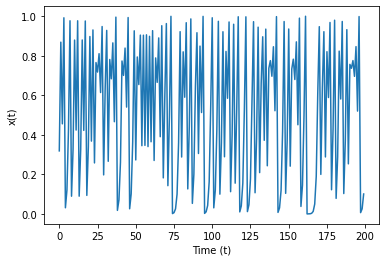

In [29]:
t = np.linspace(0, 199, 200)
plt.plot(t, x[200:400])
plt.xlabel('Time (t)')
plt.ylabel('x(t)')
plt.show()


In [30]:
l

0.62140334

In [36]:
#rosenstein lyapunov
lr = nolds.lyap_r(x,3,1,1,1)
lr

0.01729989512400194

In [40]:
#full eckman spectrum
nolds.lyap_e(x,emb_dim=10, matrix_dim=10)

array([ 2.1216304e+00,  1.4242600e+00,  1.0288792e+00,  6.6803032e-01,
        4.0636155e-01,  2.1165629e-01, -7.4436382e-04, -2.3631696e-01,
       -6.5439892e-01, -1.8946362e+00], dtype=float32)

In [ ]:
Args:
data (array-like of float):
(scalar) data points
Kwargs:
emb_dim (int):
embedding dimension
matrix_dim (int):
matrix dimension (emb_dim - 1 must be divisible by matrix_dim - 1)
min_nb (int):
minimal number of neighbors (default: min(2 * matrix_dim, matrix_dim + 4))
min_tsep (int):
minimal temporal separation between two “neighbors”
tau (float):
step size of the data in seconds (normalization scaling factor for exponents)
debug_plot (boolean):
if True, a histogram matrix of the individual estimates will be shown
debug_data (boolean):
if True, debugging data will be returned alongside the result
plot_file (str):
if debug_plot is True and plot_file is not None, the plot will be saved under the given file name instead of directly showing it through plt.show()

In [ ]:
#takeaways 
#data
#emb_dim
#matrix_dim ((matrix_dim-1)%(emb_dim-1) = 0)
#also 
long recording time improves accuracy, small tau does not
use large values for emb_dim
matrix_dim should be ‘somewhat larger than the expected number of positive Lyapunov exponents’
min_nb = min(2 * matrix_dim, matrix_dim + 4)

In [ ]:
nolds.lyap_e(x,emb_dim=10, matrix_dim=10)

In [ ]:
##seeing how nolds does lyapunov exponents makes me want to do some mutual info and fnn analysis 
#to get 'optimal' D_e and tau


In [6]:
# mutual info (from chatgpt)
from sklearn.metrics import mutual_info_score
#import numpy as np

# Create two example distributions
dist1 = np.random.normal(size=1000)
dist2 = np.random.normal(loc=dist1, scale=0.5)

# Calculate the average mutual information
mi = []
for i in range(dist1.shape[0]):
    mi.append(mutual_info_score(dist1[:, i], dist2[:, i]))
avg_mi = np.mean(mi)

print("Average mutual information:", avg_mi)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
#we want to compute average mutual info score using the code above, across a set of diff distributions
#want to do this ami as a function of tau, the amount of time delay
#essentially need to come up with a bunch of histograms or distributions
#where the sets A and B being compared in the MI analysis is from the OG time series
#and set B is histogram from a time delayed version of that vector



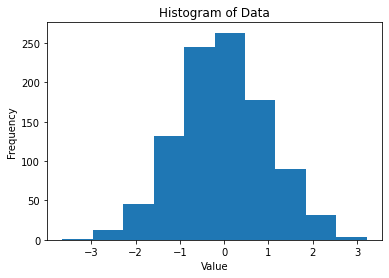

In [41]:
#histogram (from chatgpt)
#import numpy as np
#import matplotlib.pyplot as plt

# Create an example vector with 1000 samples
data = np.random.normal(size=1000)

# Calculate the histogram
hist, bins = np.histogram(data, bins=10)

# Plot the histogram
plt.hist(data, bins=bins)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.show()

In [43]:
hist

array([  1,  12,  45, 132, 245, 263, 177,  90,  32,   3], dtype=int64)

In [7]:
#recall x is a vector from discrete logistic map of length 1000
#maybe need to define function to partition vectors out of this with a possible 'delay'
def TDvec(vec, tau, l):
    new = vec[tau: (tau+l)]
    return new
    

In [8]:
vec1 = TDvec(x, 0, 200)
vec1

array([3.60000014e-01, 9.21599984e-01, 2.89013773e-01, 8.21939230e-01,
       5.85420549e-01, 9.70813334e-01, 1.13339245e-01, 4.01973844e-01,
       9.61563468e-01, 1.47836566e-01, 5.03923655e-01, 9.99938428e-01,
       2.46304786e-04, 9.84976417e-04, 3.93602531e-03, 1.56821311e-02,
       6.17448092e-02, 2.31729552e-01, 7.12123871e-01, 8.20013881e-01,
       5.90364456e-01, 9.67337012e-01, 1.26384363e-01, 4.41645414e-01,
       9.86378968e-01, 5.37419841e-02, 2.03415126e-01, 6.48149669e-01,
       9.12206709e-01, 3.20342481e-01, 8.70892704e-01, 4.49754447e-01,
       9.89901543e-01, 3.99859548e-02, 1.53548300e-01, 5.19884884e-01,
       9.98418391e-01, 6.31653843e-03, 2.51065586e-02, 9.79048759e-02,
       3.53278041e-01, 9.13890660e-01, 3.14778030e-01, 8.62771332e-01,
       4.73587930e-01, 9.97209609e-01, 1.11304224e-02, 4.40261476e-02,
       1.68351382e-01, 5.60036778e-01, 9.85582352e-01, 5.68391308e-02,
       2.14433774e-01, 6.73807740e-01, 8.79163504e-01, 4.24940228e-01,
      

In [9]:
vec2 = TDvec(x, 1, 200)
vec2

array([9.21599984e-01, 2.89013773e-01, 8.21939230e-01, 5.85420549e-01,
       9.70813334e-01, 1.13339245e-01, 4.01973844e-01, 9.61563468e-01,
       1.47836566e-01, 5.03923655e-01, 9.99938428e-01, 2.46304786e-04,
       9.84976417e-04, 3.93602531e-03, 1.56821311e-02, 6.17448092e-02,
       2.31729552e-01, 7.12123871e-01, 8.20013881e-01, 5.90364456e-01,
       9.67337012e-01, 1.26384363e-01, 4.41645414e-01, 9.86378968e-01,
       5.37419841e-02, 2.03415126e-01, 6.48149669e-01, 9.12206709e-01,
       3.20342481e-01, 8.70892704e-01, 4.49754447e-01, 9.89901543e-01,
       3.99859548e-02, 1.53548300e-01, 5.19884884e-01, 9.98418391e-01,
       6.31653843e-03, 2.51065586e-02, 9.79048759e-02, 3.53278041e-01,
       9.13890660e-01, 3.14778030e-01, 8.62771332e-01, 4.73587930e-01,
       9.97209609e-01, 1.11304224e-02, 4.40261476e-02, 1.68351382e-01,
       5.60036778e-01, 9.85582352e-01, 5.68391308e-02, 2.14433774e-01,
       6.73807740e-01, 8.79163504e-01, 4.24940228e-01, 9.77464139e-01,
      

In [10]:
#seems like time delay vector producer works fine
#let's try to make a set of vectors to use in the AMI analysis 
#.....or make a function to do it for us

def TDset(X, l, num): 
    shape = (l,num)
    arr = np.empty(shape) #number of rows l, number of columns num
    for i in range(num):
        arr[:, i] = TDvec(X, i, l)
        
    return arr


In [11]:
TDset1 = TDset(x, 200, 10)

In [66]:
np.shape(TDset1)

(200, 10)

In [62]:
TDset1[:,1]

array([9.21599984e-01, 2.89013773e-01, 8.21939230e-01, 5.85420549e-01,
       9.70813334e-01, 1.13339245e-01, 4.01973844e-01, 9.61563468e-01,
       1.47836566e-01, 5.03923655e-01, 9.99938428e-01, 2.46304786e-04,
       9.84976417e-04, 3.93602531e-03, 1.56821311e-02, 6.17448092e-02,
       2.31729552e-01, 7.12123871e-01, 8.20013881e-01, 5.90364456e-01,
       9.67337012e-01, 1.26384363e-01, 4.41645414e-01, 9.86378968e-01,
       5.37419841e-02, 2.03415126e-01, 6.48149669e-01, 9.12206709e-01,
       3.20342481e-01, 8.70892704e-01, 4.49754447e-01, 9.89901543e-01,
       3.99859548e-02, 1.53548300e-01, 5.19884884e-01, 9.98418391e-01,
       6.31653843e-03, 2.51065586e-02, 9.79048759e-02, 3.53278041e-01,
       9.13890660e-01, 3.14778030e-01, 8.62771332e-01, 4.73587930e-01,
       9.97209609e-01, 1.11304224e-02, 4.40261476e-02, 1.68351382e-01,
       5.60036778e-01, 9.85582352e-01, 5.68391308e-02, 2.14433774e-01,
       6.73807740e-01, 8.79163504e-01, 4.24940228e-01, 9.77464139e-01,
      

In [63]:
TDset1[:,4]

array([5.85420549e-01, 9.70813334e-01, 1.13339245e-01, 4.01973844e-01,
       9.61563468e-01, 1.47836566e-01, 5.03923655e-01, 9.99938428e-01,
       2.46304786e-04, 9.84976417e-04, 3.93602531e-03, 1.56821311e-02,
       6.17448092e-02, 2.31729552e-01, 7.12123871e-01, 8.20013881e-01,
       5.90364456e-01, 9.67337012e-01, 1.26384363e-01, 4.41645414e-01,
       9.86378968e-01, 5.37419841e-02, 2.03415126e-01, 6.48149669e-01,
       9.12206709e-01, 3.20342481e-01, 8.70892704e-01, 4.49754447e-01,
       9.89901543e-01, 3.99859548e-02, 1.53548300e-01, 5.19884884e-01,
       9.98418391e-01, 6.31653843e-03, 2.51065586e-02, 9.79048759e-02,
       3.53278041e-01, 9.13890660e-01, 3.14778030e-01, 8.62771332e-01,
       4.73587930e-01, 9.97209609e-01, 1.11304224e-02, 4.40261476e-02,
       1.68351382e-01, 5.60036778e-01, 9.85582352e-01, 5.68391308e-02,
       2.14433774e-01, 6.73807740e-01, 8.79163504e-01, 4.24940228e-01,
       9.77464139e-01, 8.81120563e-02, 3.21393281e-01, 8.72398555e-01,
      

In [12]:
#mmk that seems fine, got a set of diff vectors from logistic set that have been time delayed
#so now need to form histograms for each vector, or better to just use a function
#to compute histograms for all at once
#hist, bins = np.histogram(data, bins=10)
#might be possible to vectorize this process, but think I'll loop for simplicity
def histAll(data, binNum):
    dataShape = np.shape(data)
    histSetShape = (binNum, dataShape[1]) #num of rows is num of hist bins, num of columns for each diff hist
    fullHist = np.empty(histSetShape)
    for i in range(dataShape[1]):
        hist, bins = np.histogram(data[:,i], bins = binNum)
        fullHist[:,i] = hist
    return fullHist    
    

In [13]:
histAll1 = histAll(TDset1, 100)

In [18]:
histAll1[:,0]

array([10.,  6.,  3.,  2.,  4.,  4.,  3.,  1.,  3.,  4.,  1.,  2.,  3.,
        0.,  1.,  3.,  1.,  3.,  1.,  0.,  2.,  3.,  0.,  2.,  2.,  1.,
        1.,  1.,  1.,  1.,  1.,  2.,  3.,  1.,  2.,  5.,  1.,  1.,  1.,
        2.,  2.,  0.,  3.,  1.,  5.,  1.,  0.,  2.,  0.,  1.,  1.,  3.,
        1.,  0.,  0.,  1.,  1.,  3.,  1.,  2.,  0.,  0.,  1.,  0.,  1.,
        2.,  2.,  3.,  1.,  1.,  0.,  1.,  1.,  3.,  0.,  1.,  0.,  1.,
        3.,  1.,  1.,  0.,  3.,  0.,  1.,  1.,  3.,  5.,  3.,  2.,  3.,
        4.,  3.,  2.,  1.,  2.,  4.,  7.,  7., 10.])

In [27]:
np.shape(histAll1)

(100, 10)

In [ ]:
#now we have histograms for all the 'time delayed' vectors
#now just have to do mutual information score between the 1st one and the rest
#plot results, find critical point
#from sklearn.metrics import mutual_info_score
#import numpy as np

# Create two example distributions
#dist1 = np.random.normal(size=1000)
#dist2 = np.random.normal(loc=dist1, scale=0.5)

# Calculate the average mutual information
#mi = []
#for i in range(dist1.shape[0]):
#    mi.append(mutual_info_score(dist1[:, i], dist2[:, i]))
#avg_mi = np.mean(mi)

#print("Average mutual information:", avg_mi)


##note!! chatgpt is idiot! need to actually carefully define AMI

#from sklearn.metrics import mutual_info_score

#def AMIanalysis(histSet):
#    AMIsetShape = np.shape((histSet[1]-1)) #number of comparisons between sets
#    AMIset = np.empty(AMIsetShape)
#    for i in range(AMIsetShape):
#        mi = []
#        for j in range():
#            mi.append(mutual_info_score(histSet[], histSet[]))
    

In [14]:
#careful definition of AMI
#sum across all x(t), sum across all x(t-tau) => think this translates to sum across all bins of hist
#inside sum: probability of each bin in 2d hist*MI(set A, set B)
#so need to get a 2d histogram for each pair of x(t), x(t-nT) where tau = nT
#numpy.histogram2d(x, y, bins=10, range=None, density=None, weights=None)

def jointSet(data, binNum):
    numCombos = (np.shape(data)[1]-1) #since just comparisons with 1st vector
    arrShape = (binNum, binNum, numCombos)
    arr = np.empty(arrShape)
    x = data[:,0]
    for i in range(numCombos):
        y = data[:,i+1]
        H, xedges, yedges = np.histogram2d(x, y, bins=binNum)
        arr[:,:,i] = H
    return arr

In [15]:
jointSet1 = jointSet(TDset1, 100)

In [26]:
print(np.shape(jointSet1)[0])
print(np.shape(jointSet1)[1])
print(np.shape(jointSet1)[2])

100
100
9


In [28]:
#now to finally do AMI LOL
def AMI(singles, joints): ##NOTE this function assumes you want list of ALL AMI's for SET of delays
    index1 = np.shape(joints)[0]
    index2 = np.shape(joints)[1]
    dist1 = singles[:,0]
    index3 = np.shape(joints)[2]
    AMIset = np.empty(index3)
    
    for k in range(index3):
        count=0
        dist2 = singles[:,(k+1)]
        for i in range(index1):
            for j in range(index2):
                count += joints[i,j,k]*mutual_info_score(dist1, dist2)  
        AMIset[k] = count        
    return AMIset

In [29]:
AMI1 = AMI(histAll1, jointSet1) #shapes (100,10), (100,100,9)

In [30]:
##note that TDvec, set functions only steps delayed vectors along by one data unit at a time
#so NOT generalized yet to diff methods, but servicable and point I'm making here
#is for plotting purposes sufficient to use linspace to make steps
timeExample = np.linspace(1,9,9)
timeExample

array([1., 2., 3., 4., 5., 6., 7., 8., 9.])

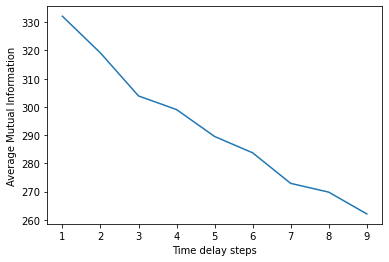

In [31]:
plt.plot(timeExample, AMI1)
plt.xlabel('Time delay steps')
plt.ylabel('Average Mutual Information')
plt.show()

In [ ]:
#here is 'execution' block
#vec1 = TDvec(x, 0, 200)
#vec2 = TDvec(x, 1, 200)

TDset1 = TDset(x, 200, 10)

histAll1 = histAll(TDset1, 100)

jointSet1 = jointSet(TDset1, 100)

AMI1 = AMI(histAll1, jointSet1)

timeExample = np.linspace(1,9,9)

plt.plot(timeExample, AMI1)
plt.xlabel('Time delay steps')
plt.ylabel('Average Mutual Information')
plt.show()

In [1]:
#mmk result is not entirely unworkable, maybe try to pull everything together in 1 func for testing
#this will be 'setup' block, imports and data

import nolds
#imports and classes
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sklearn.metrics import mutual_info_score

#example, logistic map f(x) = rx - rx^2
#f' = r - 2rx
lm = nolds.logistic_map(0.1, 1000, r=4) #starting point, numsteps, logistic parameter r>=4 gives chaos
x = np.fromiter(lm, dtype="float32")
t = np.linspace(0, 999, 1000)
#l = max(nolds.lyap_e(x))#maximum of eckman lyapunov spectrum



In [7]:
#(function) definition block
def TDvec(vec, step, l, multiplier):
    delay = step*multiplier
    new = vec[delay:(l + delay)]
    return new

def TDset(X, l, num, mult): 
    shape = (l,num)
    arr = np.empty(shape) #number of rows l, number of columns num
    for i in range(num):
        arr[:, i] = TDvec(X, i, l, mult)
        
    return arr

def histAll(data, binNum):
    dataShape = np.shape(data)
    histSetShape = (binNum, dataShape[1]) #num of rows is num of hist bins, num of columns for each diff hist
    fullHist = np.empty(histSetShape)
    for i in range(dataShape[1]):
        hist, bins = np.histogram(data[:,i], bins = binNum)
        fullHist[:,i] = hist
    return fullHist    
    
def jointSet(data, binNum):
    numCombos = (np.shape(data)[1]-1) #since just comparisons with 1st vector
    arrShape = (binNum, binNum, numCombos)
    arr = np.empty(arrShape)
    x = data[:,0]
    for i in range(numCombos):
        y = data[:,i+1]
        H, xedges, yedges = np.histogram2d(x, y, bins=binNum)
        arr[:,:,i] = H
    return arr

def AMI(singles, joints): ##NOTE this function assumes you want list of ALL AMI's for SET of delays
    index1 = np.shape(joints)[0]
    index2 = np.shape(joints)[1]
    dist1 = singles[:,0]
    index3 = np.shape(joints)[2]
    AMIset = np.empty(index3)
    
    for k in range(index3):
        count=0
        dist2 = singles[:,(k+1)]
        for i in range(index1):
            for j in range(index2):
                count += joints[i,j,k]*mutual_info_score(dist1, dist2)  
        AMIset[k] = count        
    return AMIset

In [35]:
#now try to make function to abstract all these functions above^
def AMIanalysis(data, dataWindowLength, numComparisons, numBins, TDmultiplier):
    TDsetNow = TDset(data, dataWindowLength, numComparisons, TDmultiplier)
    histAllNow = histAll(TDsetNow, numBins)
    jointSetNow = jointSet(TDsetNow, numBins)
    AMIsetNow = AMI(histAllNow, jointSetNow)
    
    plotTimeVec = np.linspace(1, (numComparisons-1), (numComparisons-1))
    plt.plot(plotTimeVec, AMIsetNow)
    plt.xlabel('Time delay steps, assuming single step units')
    plt.ylabel('Average Mutual Information')
    plt.show()

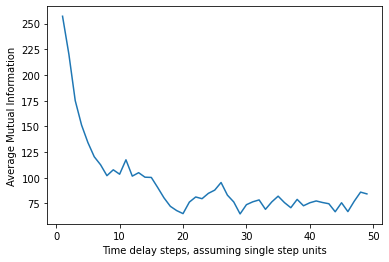

In [38]:
AMIanalysis(x, 200, 50, 100, 10)

In [ ]:
##ok! looks like mutual information pipeline is basically done, more or less, need to fix graph labels
##ALSO NEED TO GENERALIZE TO MULTIPLE DIMENSIONAL DATA, ASSUMED TO BE 1D

#now for false nearest neighbors
#the idea with this next analysis is that we want to determine how many time delay dimensions
#to utilize such that the attractor is well represented in the proxy space
#the graph that we want at the end of this: false nearest neighbor percentage as a function of D_E

#need some function to find nearest neighbors
##then need to use a piece of code to determine % of points in vector space which have NN's
###from chatGPT
###pct_nn = np.sum(np.sum(distances <= np.finfo(np.float32).eps, axis=1) > 0) / X.shape[0] * 100
#then just loop this across diff selections of D_E

In [8]:
#example code from scikit learn
from sklearn.neighbors import NearestNeighbors
import numpy as np

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

nbrs = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(X) #note 'auto' means algo choosest 'optimal' method
distances, indices = nbrs.kneighbors(X)
#indices
distances

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.41421356],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.41421356]])

In [43]:
#pct_nn = np.sum(np.sum(distances <= np.finfo(np.float32).eps, axis=1) > 0) / X.shape[0] * 100
#pct_nn

100.0

In [54]:
#X.shape[0]

6

In [45]:
#distances <= np.finfo(np.float32).eps

array([[ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False]])

In [56]:
#np.sum(distances <= np.finfo(np.float32).eps, axis=0)[1]

0

In [60]:
#from testing try this new piece of code
threshold = 0.75    #np.finfo(np.float32).eps
pct_nn = np.sum(distances <= threshold, axis=0)[1] / X.shape[0]
pct_nn
#this actually works
#now just need to think of proper 'threshold'

0.0

In [ ]:
#have to think about threshold definition
#but what I'm thinking now is to use the distances you get from the NN algo
#since that helps compensate for diff datasets having different scales of distances between points
#so use the average of the distances*3 or something weird like that, hopefully captures all points in 1D case
#then from there when higher dimensions happen we'll find a decay in NN %
#the thing that frustrates me is how arbitrary it is, mean val makes sense but then just arb *3 multiplier
# to make things more relevant to statistics could use 'significantly different'.....
#...so mean value + 5*sigma? 
# i like that better, going to code it tomorrow

In [4]:
X[0,:]
#looks like NN algo wants to see rows as an object to compare, columns being 'attributes'

array([-1, -1])

In [9]:
#define function to create variable dimensional TD object
#each loop we want to essentially build an array with dim (datalength, DE)
#use the TDvec(vec, step, l, multiplier) to functionalize
#def TDvec(vec, step, l, multiplier):
#    delay = step*multiplier
#    new = vec[delay:(l + delay)]
#    return new

def TD_DE_object(data, step, L, multiplier, DE):
    shape = (L, DE)
    arr = np.empty(shape)
    for i in range(DE):
        arr[:,i] = TDvec(data, i*step, L, multiplier)
    return arr


    

In [13]:
DEtest = TD_DE_object(x, 20, 200, 10, 2)
#DEtest
#seems fine
#might need to extend logistic map vector data beyond 1000 for analysis dataset

In [54]:
#kind of want to do 'preliminary analysis' of data for purposes of automating threshold
#could realistically do this while calculating other things, but don't want to gum up main func

def threshold(data, numSTDallowed):
    nbrs = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(data) #note 'auto' means algo choosest 'optimal' method
    distances, indices = nbrs.kneighbors(data)
    #now want statistics on the distances[1] vector such as mean and stdDev
    avg = np.mean(distances[1])
    STD = np.std(distances[1])
    #now to compartmentalize further we'll define the threshold within this func
    #rather than just reporting mean, std for use down the line
    value = avg + STD*numSTDallowed
    return value


In [36]:
datuh = TD_DE_object(x, 0, 200, 10, 1)
thresh = threshold(datuh)
#thresh

In [30]:
#also want function for % NN b/c might need to call that within the larger loop or whatever
def percentNN(data, threshold):
    nbrs = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(data) 
    distances, indices = nbrs.kneighbors(data)
    percent = np.sum(distances <= threshold, axis=0)[1] / data.shape[0]
    return percent

In [37]:
#now let's try combining some together
perc = percentNN(datuh, thresh)
perc

0.71

In [ ]:
#so what I'm thinking wrt nearest neighbors
#import library
#for the array of objects to compare in the vector space
##at first go it's just array where each 'object' corresponds to point from OG time series
##then next go round 'object' is set of points from 2D space st point is [OG, delayed]
##and so on, increasing D_E for analysis
#sufficient to calculate only nearest neighbor
#then, we want to essentially caLc % of NNs, for threshold use mean + 5sigma (from distances in 1D)
#then simply loop that algo for set of D_E, make sure to test out how it likes to receive rows/columns order
#save the % NN for each loop
#plot results
#ez game

In [25]:
import nolds
#imports and classes
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sklearn.metrics import mutual_info_score
from sklearn.neighbors import NearestNeighbors

#example, logistic map f(x) = rx - rx^2
#f' = r - 2rx
length = 3000
lm = nolds.logistic_map(0.1, length, r=4) #starting point, numsteps, logistic parameter r>=4 gives chaos
x = np.fromiter(lm, dtype="float32")
t = np.linspace(0,(length-1), length)

In [81]:
#so maybe now combine everything into a 'main'
def FNNanalysis(data, step, L, multiplier, DE_max, numSTDallowed):
    FNNvsDE = np.empty(DE_max)
    thresholdData =  TD_DE_object(data, 0*step, L, multiplier, 1)
    thresh = threshold(thresholdData, numSTDallowed)
    FNNvsDE[0] = percentNN(thresholdData, thresh)  #try to incorporate into loop
    for i in range(DE_max-1): #note want this loop to go from actual_dim = 2 to =DE_max
        actualDimension = i+2 #could fix this, but correction for how object below is coded
        arr = TD_DE_object(data, step, L, multiplier, actualDimension) #need final param to be 2, 3, ...., DE_max+1
        FNNvsDE[actualDimension - 1] = percentNN(arr, thresh)
        
    plotDEVec = np.linspace(1, (DE_max), (DE_max))
    plt.plot(plotDEVec, FNNvsDE)
    plt.xlabel('Time delay embedding dimension')
    plt.ylabel('False Nearest Neighbor percentage')
    plt.show()

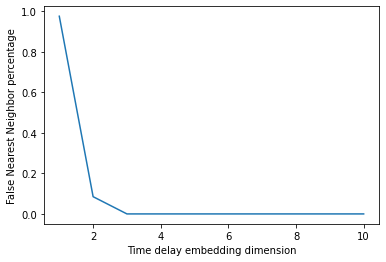

In [82]:
FNNanalysis(x, 20, 200, 10, 10, 15)
#works fine seemingly, still lingering question of how to define threshold properly

In [59]:
def FNNanalysisResultOnly(data, step, L, multiplier, DE_max, numSTDallowed):
    FNNvsDE = np.empty(DE_max)
    thresholdData =  TD_DE_object(data, 0*step, L, multiplier, 1)
    thresh = threshold(thresholdData, numSTDallowed)
    FNNvsDE[0] = percentNN(thresholdData, thresh)  #try to incorporate into loop
    for i in range(DE_max-1): #note want this loop to go from actual_dim = 2 to =DE_max
        actualDimension = i+2 #could fix this, but correction for how object below is coded
        arr = TD_DE_object(data, step, L, multiplier, actualDimension) #need final param to be 2, 3, ...., DE_max+1
        FNNvsDE[actualDimension - 1] = percentNN(arr, thresh)
        
    return FNNvsDE

In [84]:
import matplotlib.cm as cm

def FNNthresholdanalysis(data, step, L, multiplier, DE_max, numSTDallowed_max):
    plotDEVec = np.linspace(1, (DE_max), (DE_max))
    colordivider = 1/numSTDallowed_max
    #colors = np.random.rand(numSTDallowed_max)
    #y = np.random.randint(1, numSTDallowed_max, size=numSTDallowed_max)
    #color_map = cm.get_cmap('viridis')
    #colors = color_map(y)
    
    #fig, ax = plt.subplots()
    #line = ax.plot(x, y, color=colors)
    
    for i in range(numSTDallowed_max+1):
        results = FNNanalysisResultOnly(data, step, L, multiplier, DE_max, i+1)
        labelNow = 'numSTDallowed = ' + str(i+1)
        #line = ax.plot(plotDEVec, results, )
        colorNow = (0.6, 0.4, colordivider*i)
        plt.plot(plotDEVec, results, label = labelNow, color = colorNow)
    plt.xlabel('Time delay embedding dimension')
    plt.ylabel('False Nearest Neighbor percentage')
    plt.show()

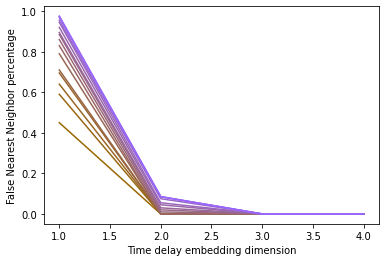

In [85]:
FNNthresholdanalysis(x, 20, 200, 10, 4, 15) #note as loop progresses, we typically move
#up the graph as the range is extended; more data included and longer step journey to convergence

In [80]:
#x axis acting up so let's test out
length = 10
np.linspace(1, length, length)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [88]:
###alright! looks like both AMI and FNN analysis functions are working smoothly
#then just really a matter of presenting the work done
##plan
#
#overview of lyapunov exponents
#specifics of nolds algorithm
#testing data: logistic map
#show some generic results
#optimization? time delay embedding!
#average mutual information overview
#show code blocks
#AMI results
#false nearest neighbors overview
#show code blocks
#FNN results
#meta analysis of 'threshold'
#return to lyapnuov results, hopefully now optimized
#desire to 'automate' tasks such as this one for use in the group
#other examples: colpitt's, L96
#
#
#staging everything below

In [1]:
#imports and classes
import nolds
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sklearn.metrics import mutual_info_score
from sklearn.neighbors import NearestNeighbors

In [121]:
#data production

length = 3000
lm = nolds.logistic_map(0.1, length, r=4) 
#logistic map f(x) = rx - rx^2

x = np.fromiter(lm, dtype="float32")

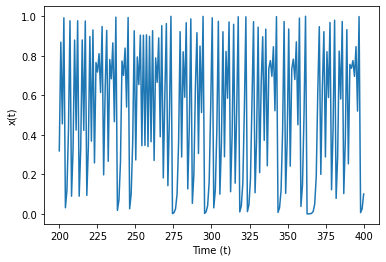

In [122]:
#plot data

start = 200
cutout = 200
t = np.linspace(start, cutout + start, cutout)
plt.plot(t, x[start:(cutout+start)])
plt.xlabel('Time (t)')
plt.ylabel('x(t)')
plt.show()

In [92]:
#full eckman spectrum example
nolds.lyap_e(x,emb_dim=10, matrix_dim=4)
#lyap_e(data, emb_dim=10, matrix_dim=4, min_nb=None, min_tsep=0, tau=1, debug_plot=False, debug_data=False, plot_file=None)
#emb_dim (int): embedding dimension
#matrix_dim (int): matrix dimension (emb_dim - 1 must be divisible by matrix_dim - 1)
#min_nb (int): minimal number of neighbors (default: min(2 * matrix_dim, matrix_dim + 4))
#min_tsep (int): minimal temporal separation between two “neighbors”
#tau (float): step size of the data in seconds (normalization scaling factor for exponents)
#debug_plot (boolean): if True, a histogram matrix of the individual estimates will be shown
#debug_data (boolean): if True, debugging data will be returned alongside the result
#plot_file (str): if debug_plot is True and plot_file is not None, the plot will be saved under the given file name instead of directly showing it through plt.show()

#parameter recommendations
#long recording time improves accuracy, small tau does not
#use large values for emb_dim
#matrix_dim should be ‘somewhat larger than the expected number of positive Lyapunov exponents’
#min_nb = min(2 * matrix_dim, matrix_dim + 4)


array([ 1.2260833,  1.0134785,  0.5583797, -1.02007  ], dtype=float32)

In [59]:
#time delay vector maker (function)

def TDvec(vec, step, l, multiplier):
    delay = step*multiplier
    new = vec[delay:(l + delay)]
    return new


In [60]:
#Average Mutual Information functions

def TDset(X, l, num, mult): 
    shape = (l,num)
    arr = np.empty(shape) #number of rows l, number of columns num
    for i in range(num):
        arr[:, i] = TDvec(X, i, l, mult)
        
    return arr

def histAll(data, binNum):
    dataShape = np.shape(data)
    histSetShape = (binNum, dataShape[1]) #num of rows is num of hist bins, num of columns for each diff hist
    fullHist = np.empty(histSetShape)
    for i in range(dataShape[1]):
        hist, bins = np.histogram(data[:,i], bins = binNum)
        fullHist[:,i] = hist
    return fullHist    
    
def jointSet(data, binNum):
    numCombos = (np.shape(data)[1]-1) #since just comparisons with 1st vector
    arrShape = (binNum, binNum, numCombos)
    arr = np.empty(arrShape)
    x = data[:,0]
    for i in range(numCombos):
        y = data[:,i+1]
        H, xedges, yedges = np.histogram2d(x, y, bins=binNum)
        arr[:,:,i] = H
    return arr

def AMI(singles, joints): ##NOTE this function assumes you want list of ALL AMI's for SET of delays
    index1 = np.shape(joints)[0]
    index2 = np.shape(joints)[1]
    dist1 = singles[:,0]
    index3 = np.shape(joints)[2]
    AMIset = np.empty(index3)
    
    for k in range(index3):
        count=0
        dist2 = singles[:,(k+1)]
        for i in range(index1):
            for j in range(index2):
                count += joints[i,j,k]*mutual_info_score(dist1, dist2)  
        AMIset[k] = count        
    return AMIset


In [61]:
#function to combine different pieces for full analysis

def AMIanalysis(data, dataWindowLength, numComparisons, numBins, TDmultiplier):
    TDsetNow = TDset(data, dataWindowLength, numComparisons, TDmultiplier)
    histAllNow = histAll(TDsetNow, numBins)
    jointSetNow = jointSet(TDsetNow, numBins)
    AMIsetNow = AMI(histAllNow, jointSetNow)
    
    plotTimeVec = np.linspace(1, (numComparisons-1), (numComparisons-1))
    plt.plot(plotTimeVec, AMIsetNow)
    plt.xlabel('Time delay steps, units = ' + str(TDmultiplier) + 'steps')
    plt.ylabel('Average Mutual Information')
    plt.show()

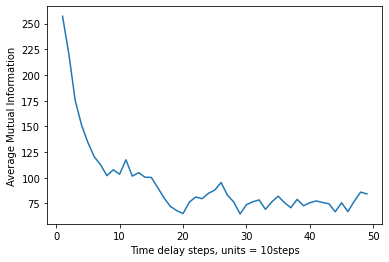

In [107]:
#AMI analysis result

AMIanalysis(x, 200, 50, 100, 10)


In [62]:
#False Nearest Neighbors functions

def TD_DE_object(data, step, L, multiplier, DE):
    shape = (L, DE)
    arr = np.empty(shape)
    for i in range(DE):
        arr[:,i] = TDvec(data, i*step, L, multiplier)
    return arr

def threshold(data, numSTDallowed):
    nbrs = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(data) #note 'auto' means algo choosest 'optimal' method
    distances, indices = nbrs.kneighbors(data)
    #now want statistics on the distances[1] vector such as mean and stdDev
    avg = np.mean(distances[1])
    STD = np.std(distances[1])
    #now to compartmentalize further we'll define the threshold within this func
    #rather than just reporting mean, std for use down the line
    value = avg + STD*numSTDallowed
    return value

def percentNN(data, threshold):
    nbrs = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(data) 
    distances, indices = nbrs.kneighbors(data)
    percent = np.sum(distances <= threshold, axis=0)[1] / data.shape[0]
    return percent


In [63]:
#function to combine different pieces for FNN analysis

def FNNanalysis(data, step, L, multiplier, DE_max, numSTDallowed):
    FNNvsDE = np.empty(DE_max)
    thresholdData =  TD_DE_object(data, 0*step, L, multiplier, 1)
    thresh = threshold(thresholdData, numSTDallowed)
    FNNvsDE[0] = percentNN(thresholdData, thresh)  
    for i in range(DE_max-1): #note want this loop to go from actual_dim = 2 to =DE_max___data, dataWindowLength, numComparisons, numBins, TDmultiplier, FNN__data, step, L, multiplier, DE_max, numSTDallowed
        actualDimension = i+2 #could fix this, but correction for how object below is coded
        arr = TD_DE_object(data, step, L, multiplier, actualDimension) #need final param to be 2, 3, ...., DE_max+1
        FNNvsDE[actualDimension - 1] = percentNN(arr, thresh)
        
    plotDEVec = np.linspace(1, (DE_max), (DE_max))
    plt.plot(plotDEVec, FNNvsDE)
    plt.xlabel('Time delay embedding dimension')
    plt.ylabel('False Nearest Neighbor percentage')
    plt.show()

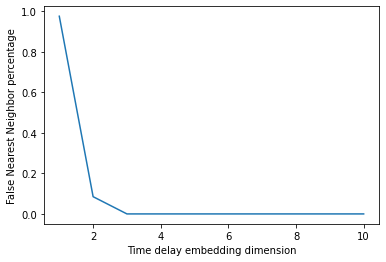

In [101]:
#results from FNN

FNNanalysis(x, 20, 200, 10, 10, 15)


In [64]:
#FNN function but just return results for later use

def FNNanalysisResultOnly(data, step, L, multiplier, DE_max, numSTDallowed):
    FNNvsDE = np.empty(DE_max)
    thresholdData =  TD_DE_object(data, 0*step, L, multiplier, 1)
    thresh = threshold(thresholdData, numSTDallowed)
    FNNvsDE[0] = percentNN(thresholdData, thresh)  #try to incorporate into loop
    for i in range(DE_max-1): #note want this loop to go from actual_dim = 2 to =DE_max
        actualDimension = i+2 #could fix this, but correction for how object below is coded
        arr = TD_DE_object(data, step, L, multiplier, actualDimension) #need final param to be 2, 3, ...., DE_max+1
        FNNvsDE[actualDimension - 1] = percentNN(arr, thresh)
        
    return FNNvsDE


In [65]:
#function to analyze effect of distance threshold on FNN analysis results

def FNNthresholdanalysis(data, step, L, multiplier, DE_max, numSTDallowed_max):
    plotDEVec = np.linspace(1, (DE_max), (DE_max))
    colordivider = 1/numSTDallowed_max
    
    for i in range(numSTDallowed_max+1):
        results = FNNanalysisResultOnly(data, step, L, multiplier, DE_max, i+1)
        labelNow = 'numSTDallowed = ' + str(i+1)
        #line = ax.plot(plotDEVec, results, )
        colorNow = (0.6, 0.4, colordivider*i)
        plt.plot(plotDEVec, results, label = labelNow, color = colorNow)
    plt.xlabel('Time delay embedding dimension')
    plt.ylabel('False Nearest Neighbor percentage')
    plt.show()
    

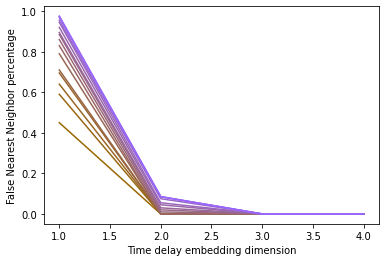

In [104]:
#results from threshold meta-analysis

FNNthresholdanalysis(x, 20, 200, 10, 4, 15) #note as loop progresses, we typically move
#up the graph as the range is extended; more data included and longer step journey to convergence


In [108]:
#so going off of information, it seems optimal lyapunov analysis would be for 
#DE = 3, tau = 200 steps
#however note (emb_dim - 1 must be divisible by matrix_dim - 1) 
#and since have previously found positive exponents ~3 at minimum so need matrix dim 4 or higher
#so matrix_dim = 4 => emb_dim = 4 at the lowest
nolds.lyap_e(x,emb_dim=4, matrix_dim=4, tau = 200)

array([ 0.00760524,  0.00644918,  0.00337687, -0.00299829], dtype=float32)

In [123]:
#now maybe try with stable logistic map, r=2 leads to fixed point behavior
length = 3000
lm = nolds.logistic_map(0.1, length, r=2) 
#logistic map f(x) = rx - rx^2

x = np.fromiter(lm, dtype="float32")

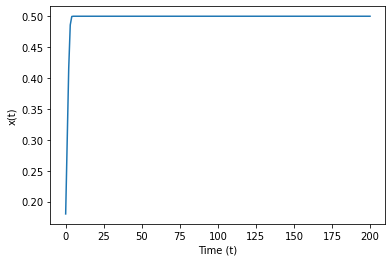

In [125]:
#plot data

start = 0
cutout = 200
t = np.linspace(start, cutout + start, cutout)
plt.plot(t, x[start:(cutout+start)])
plt.xlabel('Time (t)')
plt.ylabel('x(t)')
plt.show()

In [112]:
nolds.lyap_e(x,emb_dim=4, matrix_dim=4, tau = 200)

array([-1.7138360e-02, -1.7216422e-02, -6.8637490e-02, -2.7755575e-19],
      dtype=float32)

In [126]:
#now maybe try with pseudo-stable logistic map, r=3.25 beyond bifurcative behavior threshold
length = 3000
lm = nolds.logistic_map(0.1, length, r=3.25) 
#logistic map f(x) = rx - rx^2

x = np.fromiter(lm, dtype="float32")

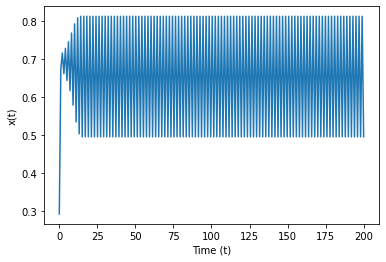

In [127]:
#plot data

start = 0
cutout = 200
t = np.linspace(start, cutout + start, cutout)
plt.plot(t, x[start:(cutout+start)])
plt.xlabel('Time (t)')
plt.ylabel('x(t)')
plt.show()

In [128]:
nolds.lyap_e(x,emb_dim=4, matrix_dim=4, tau = 200)

array([-0.00923308, -0.00246989, -0.00842442, -0.02391828], dtype=float32)

In [129]:
#now maybe try with semi-chaotic logistic map, r=3.75 beyond chaotic behavior threshold
length = 3000
lm = nolds.logistic_map(0.1, length, r=3.75) 
#logistic map f(x) = rx - rx^2

x = np.fromiter(lm, dtype="float32")

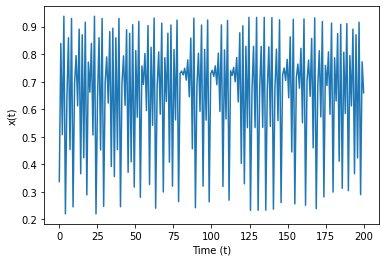

In [130]:
#plot data

start = 0
cutout = 200
t = np.linspace(start, cutout + start, cutout)
plt.plot(t, x[start:(cutout+start)])
plt.xlabel('Time (t)')
plt.ylabel('x(t)')
plt.show()

In [131]:
nolds.lyap_e(x,emb_dim=4, matrix_dim=4, tau = 200)

array([ 0.00351906,  0.00183899,  0.00020397, -0.00306937], dtype=float32)

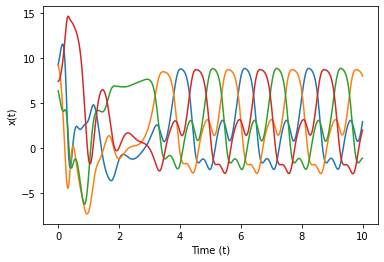

In [132]:
#lorenz 96 model setup
def lorenz96(x, t, N, F):
    dxdt = np.zeros(N)
    for i in range(N):
        dxdt[i] = (x[(i+1)%N] - x[(i-2)%N]) * x[(i-1)%N] - x[i] + F
    return dxdt

#lorenz 96 model solution
from scipy.integrate import solve_ivp

N = 4
F = 8
x0 = F * np.ones(N) + np.random.randn(N)

t_eval = np.linspace(0, 10, 1000)
sol = solve_ivp(lambda t, x: lorenz96(x, t, N, F), [0, 10], x0, t_eval=t_eval)

#lorenz 96 plot
import matplotlib.pyplot as plt

for i in range(N):
    plt.plot(sol.t, sol.y[i,:])

plt.xlabel('Time (t)')
plt.ylabel('x(t)')
plt.show()

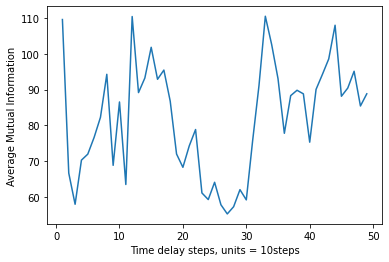

In [136]:
AMIanalysis(sol.y[1], 200, 50, 100, 10)

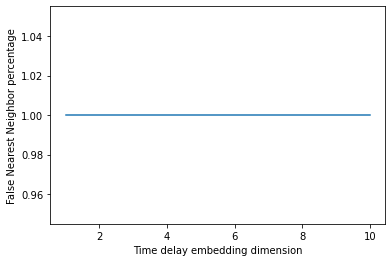

In [143]:
FNNanalysis(sol.y[1], 5, 200, 10, 10, 15)

In [144]:
nolds.lyap_e(sol.y[1],emb_dim=4, matrix_dim=4, tau = 50)

array([ 0.00047952, -0.00031602, -0.00140212, -0.01002104], dtype=float32)

In [10]:
#now try on physical circuit data (colpitt's)
T = np.loadtxt('C:/Users/lukef/Google Drive/UCSD/research/winter23/200B stuff/capstone/colpitt data/colpittsTime.txt')
X = np.loadtxt('C:/Users/lukef/Google Drive/UCSD/research/winter23/200B stuff/capstone/colpitt data/colpittsX.txt')
Y = np.loadtxt('C:/Users/lukef/Google Drive/UCSD/research/winter23/200B stuff/capstone/colpitt data/colpittsY.txt')
Z = np.loadtxt('C:/Users/lukef/Google Drive/UCSD/research/winter23/200B stuff/capstone/colpitt data/colpittsZ.txt')
#T

In [11]:
np.shape(X)

(181,)

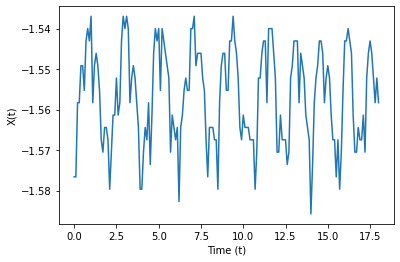

In [37]:
plt.plot(T, X)
plt.xlabel('Time (t)')
plt.ylabel('X(t)')
plt.show()

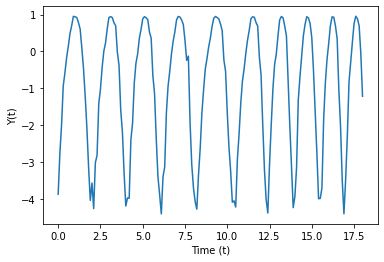

In [36]:
plt.plot(T, Y)
plt.xlabel('Time (t)')
plt.ylabel('Y(t)')
plt.show()

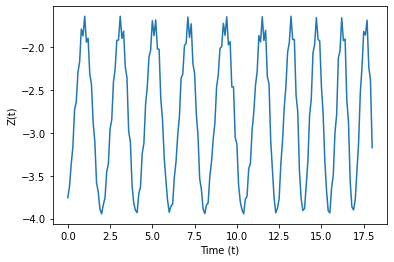

In [35]:
plt.plot(T, Z)
plt.xlabel('Time (t)')
plt.ylabel('Z(t)')
plt.show()

In [ ]:
#AMIanalysis(x, 200, 50, 100, 10)
#AMIanalysis(data, dataWindowLength, numComparisons, numBins, TDmultiplier):
#FNNanalysis(x, 20, 200, 10, 10, 15)
#FNNanalysis(data, step, L, multiplier, DE_max, numSTDallowed):

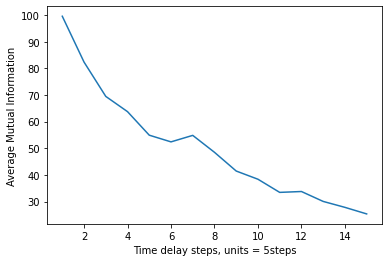

In [15]:
AMIanalysis(Z, 100, 16, 100, 5)

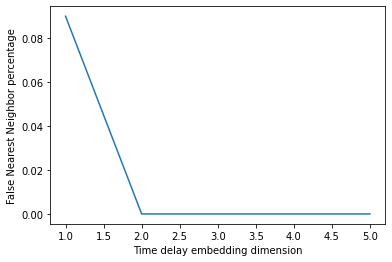

In [20]:
FNNanalysis(Z, 5, 100, 2, 5, 100)

In [22]:
#The algorithm of Rosenstein et al. is only able to recover the largest Lyapunov exponent, but behaves rather robust to parameter choices.

#The idea for the algorithm relates closely to the definition of Lyapunov exponents. First, the dynamics of the data are reconstructed using a delay embedding method with a lag, such that each value x_i of the data is mapped to the vector

#X_i = [x_i, x_(i+lag), x_(i+2*lag), …, x_(i+(emb_dim-1) * lag)]

#For each such vector X_i, we find the closest neighbor X_j using the euclidean distance. We know that as we follow the trajectories from X_i and X_j in time in a chaotic system the distances between X_(i+k) and X_(j+k) denoted as d_i(k) will increase according to a power law d_i(k) = c * e^(lambda * k) where lambda is a good approximation of the highest Lyapunov exponent, because the exponential expansion along the axis associated with this exponent will quickly dominate the expansion or contraction along other axes.

#To calculate lambda, we look at the logarithm of the distance trajectory, because log(d_i(k)) = log(c) + lambda * k. This gives a set of lines (one for each index i) whose slope is an approximation of lambda. We therefore extract the mean log trajectory d’(k) by taking the mean of log(d_i(k)) over all orbit vectors X_i. We then fit a straight line to the plot of d’(k) versus k. The slope of the line gives the desired parameter lambda.


#Method for choosing min_tsep:
#Usually we want to find neighbors between points that are close in phase space but not too close in time, because we want to avoid spurious correlations between the obtained trajectories that originate from temporal dependencies rather than the dynamic properties of the system. Therefore it is critical to find a good value for min_tsep. One rather plausible estimate for this value is to set min_tsep to the mean period of the signal, which can be obtained by calculating the mean frequency using the fast fourier transform. This procedure is used by default if the user sets min_tsep = None.
#Method for choosing lag:
#Another parameter that can be hard to choose by instinct alone is the lag between individual values in a vector of the embedded orbit. Here, Rosenstein et al. suggest to set the lag to the distance where the autocorrelation function drops below 1 - 1/e times its original (maximal) value. This procedure is used by default if the user sets lag = None.

#Kwargs:

#emb_dim (int):
#embedding dimension for delay embedding

#lag (float):
#lag for delay embedding

#min_tsep (float):
#minimal temporal separation between two “neighbors” (default: find a suitable value by calculating the mean period of the data)

#tau (float):
#step size between data points in the time series in seconds (normalization scaling factor for exponents)

#min_neighbors (int):
#if lag=None, the search for a suitable lag will be stopped when the number of potential neighbors for a vector drops below min_neighbors

#trajectory_len (int):
#the time (in number of data points) to follow the distance trajectories between two neighboring points

#fit (str):
#the fitting method to use for the line fit, either ‘poly’ for normal least squares polynomial fitting or ‘RANSAC’ for RANSAC-fitting which is more robust to outliers

#debug_plot (boolean):
#if True, a simple plot of the final line-fitting step will be shown

#debug_data (boolean):
#if True, debugging data will be returned alongside the result

#plot_file (str):
#if debug_plot is True and plot_file is not None, the plot will be saved under the given file name instead of directly showing it through plt.show()

#fit_offset (int):
#neglect the first fit_offset steps when fitting


#nolds.lyap_r(data, emb_dim=10, lag=None, min_tsep=None, tau=1, min_neighbors=20, trajectory_len=20, fit=u'RANSAC', debug_plot=False, debug_data=False, plot_file=None, fit_offset=0)




nolds.lyap_r(Z,emb_dim=4, tau = 50)

#return: an estimate of the largest Lyapunov exponent (a positive exponent is a strong indicator for chaos)

c:\users\lukef\appdata\local\programs\python\python39\lib\site-packages\nolds\measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 45
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
c:\users\lukef\appdata\local\programs\python\python39\lib\site-packages\nolds\measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 17
  warnings.warn(msg.format(lag), RuntimeWarning)


0.0002119558080087733

In [23]:
#The Lyapunov exponent describes the rate of separation of two infinitesimally close trajectories of a dynamical system in phase space. In a chaotic system, these trajectories diverge exponentially following the equation:

#|X(t, X_0) - X(t, X_0 + eps)| = e^(lambda * t) * |eps|

#In this equation X(t, X_0) is the trajectory of the system X starting at the point X_0 in phase space at time t. eps is the (infinitesimal) difference vector and lambda is called the Lyapunov exponent. If the system has more than one free variable, the phase space is multidimensional and each dimension has its own Lyapunov exponent. The existence of at least one positive Lyapunov exponent is generally seen as a strong indicator for chaos.


#To calculate the Lyapunov exponents analytically, the Jacobian of the system is required. The algorithm of Eckmann et al. therefore tries to estimate this Jacobian by reconstructing the dynamics of the system from which the time series was obtained. For this, several steps are required:

#Embed the time series [x_1, x_2, …, x_(N-1)] in an orbit of emb_dim dimensions (map each point x_i of the time series to a vector [x_i, x_(i+1), x_(i+2), … x_(i+emb_dim-1)]).
#For each vector X_i in this orbit find a radius r_i so that at least min_nb other vectors lie within (chebyshev-)distance r_i around X_i. These vectors will be called “neighbors” of X_i.
#Find the Matrix T_i that sends points from the neighborhood of X_i to the neighborhood of X_(i+1). To avoid undetermined values in T_i, we construct T_i not with size (emb_dim x emb_dim) but with size (matrix_dim x matrix_dim), so that we have a larger “step size” m in the X_i, which are now defined as X’_i = [x_i, x_(i+m), x_(i+2m), … x_(i+(matrix_dim-1)*m)]. This means that emb_dim-1 must be divisible by matrix_dim-1. The T_i are then found by a linear least squares fit, assuring that T_i (X_j - X_i) ~= X_(j+m) - X_(i+m) for any X_j in the neighborhood of X_i.
#Starting with i = 1 and Q_0 = identity successively decompose the matrix T_i * Q_(i-1) into the matrices Q_i and R_i by a QR-decomposition.
#Calculate the Lyapunov exponents from the mean of the logarithm of the diagonal elements of the matrices R_i. To normalize the Lyapunov exponents, they have to be divided by m and by the step size tau of the original time series.


#Recommendations for parameter settings by Eckmann et al.:
#long recording time improves accuracy, small tau does not
#use large values for emb_dim
#matrix_dim should be ‘somewhat larger than the expected number of positive Lyapunov exponents’
#min_nb = min(2 * matrix_dim, matrix_dim + 4)


#Kwargs:

#emb_dim (int):
#embedding dimension

#matrix_dim (int):
#matrix dimension (emb_dim - 1 must be divisible by matrix_dim - 1)

#min_nb (int):
#minimal number of neighbors (default: min(2 * matrix_dim, matrix_dim + 4))

#min_tsep (int):
#minimal temporal separation between two “neighbors”

#tau (float):
#step size of the data in seconds (normalization scaling factor for exponents)

#debug_plot (boolean):
#if True, a histogram matrix of the individual estimates will be shown

#debug_data (boolean):
#if True, debugging data will be returned alongside the result

#plot_file (str):
#if debug_plot is True and plot_file is not None, the plot will be saved under the given file name instead of directly showing it through plt.show()


nolds.lyap_e(Z,emb_dim=4, matrix_dim=4, tau = 50)


# return: array of matrix_dim Lyapunov exponents (positive exponents are indicators for chaos)



array([ 0.00391533, -0.00014345, -0.00459639, -0.01442386], dtype=float32)

In [26]:
#sample entropy (nolds)
#nolds.sampen(data, emb_dim=2, tolerance=None, dist=<function rowwise_chebyshev>, closed=False, debug_plot=False, debug_data=False, plot_file=None)

#The sample entropy of a time series is defined as the negative natural logarithm of the conditional probability 
#that two sequences similar for emb_dim points remain similar at the next point, excluding self-matches.

#A lower value for the sample entropy therefore corresponds to a higher probability indicating more self-similarity.

#Explanation of the algorithm:
#The algorithm constructs all subsequences of length emb_dim [s_1, s_2, s_3, …] and then counts each pair 
#(s_i, s_j) with i != j where dist(s_i, s_j) < tolerance. The same process is repeated for all subsequences of 
#length emb_dim + 1. The sum of similar sequence pairs with length emb_dim + 1 is divided by the sum of similar 
#sequence pairs with length emb_dim. The result of the algorithm is the negative logarithm of this ratio/probability.

#Kwargs:

#emb_dim (int):
#the embedding dimension (length of vectors to compare)

#tolerance (float):
#distance threshold for two template vectors to be considered equal (default: 0.2 * std(data) at emb_dim = 2, corrected for dimension effect for other values of emb_dim)

#dist (function (2d-array, 1d-array) -> 1d-array):
#distance function used to calculate the distance between template vectors. Sampen is defined using rowwise_chebyshev. You should only use something else, if you are sure that you need it.

#closed (boolean):
#if True, will check for vector pairs whose distance is in the closed interval [0, r] (less or equal to r), otherwise the open interval [0, r) (less than r) will be used

#debug_plot (boolean):
#if True, a histogram of the individual distances for m and m+1

#debug_data (boolean):
#if True, debugging data will be returned alongside the result

#plot_file (str):
#if debug_plot is True and plot_file is not None, the plot will be saved under the given file name instead of directly showing it through plt.show()

                                                                                                                                        
                                                                                  
nolds.sampen(Z)


#return the sample entropy of the data (negative logarithm of ratio between similar template vectors of length emb_dim + 1 and emb_dim)



0.5464259554112074

In [27]:
#hurst exponent (nolds)
#The Hurst exponent is a measure for the “long-term memory” of a time series, meaning the long statistical dependencies in the data that do not originate from cycles.

#It originates from H.E. Hursts observations of the problem of long-term storage in water reservoirs. If x_i is the discharge of a river in year i and we observe this discharge for N years, we can calculate the storage capacity that would be required to keep the discharge steady at its mean value.

#To do so, we first substract the mean over all x_i from the individual x_i to obtain the departures x’_i from the mean for each year i. As the excess or deficit in discharge always carrys over from year i to year i+1, we need to examine the cumulative sum of x’_i, denoted by y_i. This cumulative sum represents the filling of our hypothetical storage. If the sum is above 0, we are storing excess discharge from the river, if it is below zero we have compensated a deficit in discharge by releasing water from the storage. The range (maximum - minimum) R of y_i therefore represents the total capacity required for the storage.

#Hurst showed that this value follows a steady trend for varying N if it is normalized by the standard deviation sigma over the x_i. Namely he obtained the following formula:

#R/sigma = (N/2)^K

#In this equation, K is called the Hurst exponent. Its value is 0.5 for white noise, but becomes greater for time series that exhibit some positive dependency on previous values. For negative dependencies it becomes less than 0.5.


#nvals (iterable of int):
#sizes of subseries to use (default: logmid_n(total_N, ratio=1/4.0, nsteps=15) , that is 15 logarithmically spaced values in the medium 25% of the logarithmic range)
#Generally, the choice for n is a trade-off between the length and the number of the subsequences that are used for the calculation of the (R/S)_n. Very low values of n lead to high variance in the r and s while very high values may leave too few subsequences that the mean along them is still meaningful. Logarithmic spacing makes sense, because it translates to even spacing in the log-log-plot.

#fit (str):
#the fitting method to use for the line fit, either ‘poly’ for normal least squares polynomial fitting or ‘RANSAC’ for RANSAC-fitting which is more robust to outliers

#debug_plot (boolean):
#if True, a simple plot of the final line-fitting step will be shown

#debug_data (boolean):
#if True, debugging data will be returned alongside the result

#plot_file (str):
#if debug_plot is True and plot_file is not None, the plot will be saved under the given file name instead of directly showing it through plt.show()

#corrected (boolean):
#if True, the Anis-Lloyd-Peters correction factor will be applied to the output according to the expected value for the individual (R/S)_n (see [h_3])

#unbiased (boolean):
#if True, the standard deviation based on the unbiased variance (1/(N-1) instead of 1/N) will be used. This should be the default choice, since the true mean of the sequences is not known. This parameter should only be changed to recreate results of other implementations.


#nolds.hurst_rs(data, nvals=None, fit=u'RANSAC', debug_plot=False, debug_data=False, plot_file=None, corrected=True, unbiased=True)

nolds.hurst_rs(Z)


# return: estimated Hurst exponent K using a rescaled range approach (if K = 0.5 there are no long-range correlations in the data, if K < 0.5 there are negative long-range 
#correlations, if K > 0.5 there are positive long-range correlations)




0.8901347836919438

In [33]:
#correlation dimension (nolds)

#The correlation dimension is a characteristic measure that can be used to describe the geometry of chaotic attractors. It is defined using the correlation sum C(r) which is the fraction of pairs of points X_i in the phase space whose distance is smaller than r.

#If the relation between C(r) and r can be described by the power law

#C(r) ~ r^D

#then D is called the correlation dimension of the system.

#In a d-dimensional system, the maximum value for D is d. This value is obtained for systems that expand uniformly in each dimension with time. The lowest possible value is 0 for a system with constant C(r) (i.e. a system that visits just one point in the phase space). Generally if D is lower than d and the system has an attractor, this attractor is called “strange” and D is a measure of this “strangeness”.


#Args:
#data (array-like of float):
#time series of data points
#emb_dim (int):
#embedding dimension

#Kwargs:

#rvals (iterable of float):
#list of values for to use for r (default: logarithmic_r(0.1 * std, 0.5 * std, 1.03))

#dist (function (2d-array, 1d-array) -> 1d-array):
#row-wise difference function

#fit (str):
#the fitting method to use for the line fit, either ‘poly’ for normal least squares polynomial fitting or ‘RANSAC’ for RANSAC-fitting which is more robust to outliers

#debug_plot (boolean):
#if True, a simple plot of the final line-fitting step will be shown

#debug_data (boolean):
#if True, debugging data will be returned alongside the result

#plot_file (str):
#if debug_plot is True and plot_file is not None, the plot will be saved under the given file name instead of directly showing it through plt.show()


#nolds.corr_dim(data, emb_dim, rvals=None, dist=<function rowwise_euclidean>, fit=u'RANSAC', debug_plot=False, debug_data=False, plot_file=None)

nolds.corr_dim(Z,2)


# return: correlation dimension as slope of the line fitted to log(r) vs log(C(r))





1.266946812900993

In [34]:
# detrended fluctuation analysis (nolds)

#Detrended fluctuation analysis, much like the Hurst exponent, is used to find long-term statistical dependencies in time series.

#The idea behind DFA originates from the definition of self-affine processes. A process X is said to be self-affine if the standard deviation of the values within a window of length n changes with the window length factor L in a power law:

#std(X,L * n) = L^H * std(X, n)

#where std(X, k) is the standard deviation of the process X calculated over windows of size k. In this equation, H is called the Hurst parameter, which behaves indeed very similar to the Hurst exponent.

#Like the Hurst exponent, H can be obtained from a time series by calculating std(X,n) for different n and fitting a straight line to the plot of log(std(X,n)) versus log(n).

#To calculate a single std(X,n), the time series is split into windows of equal length n, so that the ith window of this size has the form

#W_(n,i) = [x_i, x_(i+1), x_(i+2), … x_(i+n-1)]

#The value std(X,n) is then obtained by calculating std(W_(n,i)) for each i and averaging the obtained values over i.

#The aforementioned definition of self-affinity, however, assumes that the process is non-stationary (i.e. that the standard deviation changes over time) and it is highly influenced by local and global trends of the time series.

#To overcome these problems, an estimate alpha of H is calculated by using a “walk” or “signal profile” instead of the raw time series. This walk is obtained by substracting the mean and then taking the cumulative sum of the original time series. The local trends are removed for each window separately by fitting a polynomial p_(n,i) to the window W_(n,i) and then calculating W’_(n,i) = W_(n,i) - p_(n,i) (element-wise substraction).

#We then calculate std(X,n) as before only using the “detrended” window W’_(n,i) instead of W_(n,i). Instead of H we obtain the parameter alpha from the line fitting.

#For alpha < 1 the underlying process is stationary and can be modelled as fractional Gaussian noise with H = alpha. This means for alpha = 0.5 we have no correlation or “memory”, for 0.5 < alpha < 1 we have a memory with positive correlation and for alpha < 0.5 the correlation is negative.

#For alpha > 1 the underlying process is non-stationary and can be modeled as fractional Brownian motion with H = alpha - 1.



#Recommendations for parameter settings by Hardstone et al.:
#nvals should be equally spaced on a logarithmic scale so that each window scale hase the same weight
#min(nvals) < 4 does not make much sense as fitting a polynomial (even if it is only of order 1) to 3 or less data points is very prone.
#max(nvals) > len(data) / 10 does not make much sense as we will then have less than 10 windows to calculate the average fluctuation
#use overlap=True to obtain more windows and therefore better statistics (at an increased computational cost)

#Kwargs:

#nvals (iterable of int):
#subseries sizes at which to calculate fluctuation (default: logarithmic_n(4, 0.1*len(data), 1.2))

#overlap (boolean):
#if True, the windows W_(n,i) will have a 50% overlap, otherwise non-overlapping windows will be used

#order (int):
#(polynomial) order of trend to remove

#fit_trend (str):
#the fitting method to use for fitting the trends, either ‘poly’ for normal least squares polynomial fitting or ‘RANSAC’ for RANSAC-fitting which is more robust to outliers but also tends to lead to unstable results

#fit_exp (str):
#the fitting method to use for the line fit, either ‘poly’ for normal least squares polynomial fitting or ‘RANSAC’ for RANSAC-fitting which is more robust to outliers

#debug_plot (boolean):
#if True, a simple plot of the final line-fitting step will be shown

#debug_data (boolean):
#if True, debugging data will be returned alongside the result

#plot_file (str):
#if debug_plot is True and plot_file is not None, the plot will be saved under the given file name instead of directly showing it through plt.show()



#nolds.dfa(data, nvals=None, overlap=True, order=1, fit_trend=u'poly', fit_exp=u'RANSAC', debug_plot=False, debug_data=False, plot_file=None)

nolds.dfa(Z)




#return: the estimate alpha for the Hurst parameter (alpha < 1: stationary process similar to fractional Gaussian noise with H = alpha, alpha > 1: non-stationary process 
#similar to fractional Brownian motion with H = alpha - 1)





1.8074929212081812

In [19]:
#imports and classes
import nolds
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sklearn.metrics import mutual_info_score
from sklearn.neighbors import NearestNeighbors
import math

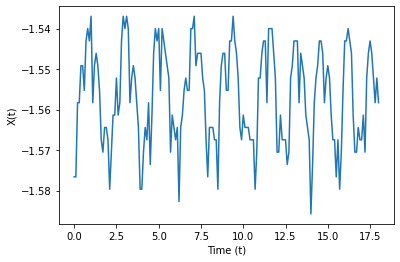

In [3]:
#now try on physical circuit data (colpitt's)
T = np.loadtxt('C:/Users/lukef/Google Drive/UCSD/research/winter23/200B stuff/capstone/colpitt data/colpittsTime.txt')
X = np.loadtxt('C:/Users/lukef/Google Drive/UCSD/research/winter23/200B stuff/capstone/colpitt data/colpittsX.txt')
Y = np.loadtxt('C:/Users/lukef/Google Drive/UCSD/research/winter23/200B stuff/capstone/colpitt data/colpittsY.txt')
Z = np.loadtxt('C:/Users/lukef/Google Drive/UCSD/research/winter23/200B stuff/capstone/colpitt data/colpittsZ.txt')
#T
np.shape(X)
plt.plot(T, X)
plt.xlabel('Time (t)')
plt.ylabel('X(t)')
plt.show()

In [79]:
#function to call each of the above analyses
def bigAnalysis(data, Emb_dim, Tau):#, dataWindowLength, step, TDmultiplier, numComparisons, numBins, DE_max, numSTDallowed):
    #AMIanalysis(sol.y[1], 200, 50, 100, 10)
    #FNNanalysis(sol.y[1], 5, 200, 10, 10, 15)
    #data, dataWindowLength, numComparisons, numBins, TDmultiplier, FNN__data, step, L, multiplier, DE_max, numSTDallowed
    #nolds.lyap_r(data, emb_dim=10, lag=None, min_tsep=None, tau=1, min_neighbors=20, trajectory_len=20, fit=u'RANSAC', debug_plot=False, debug_data=False, plot_file=None, fit_offset=0)
    #nolds.lyap_e(Z,emb_dim=4, matrix_dim=4, tau = 50)
    ##nolds.sampen(data, emb_dim=2, tolerance=None, dist=<function rowwise_chebyshev>, closed=False, debug_plot=False, debug_data=False, plot_file=None)
    ##nolds.hurst_rs(data, nvals=None, fit=u'RANSAC', debug_plot=False, debug_data=False, plot_file=None, corrected=True, unbiased=True)
    ##nolds.corr_dim(data, emb_dim, rvals=None, dist=<function rowwise_euclidean>, fit=u'RANSAC', debug_plot=False, debug_data=False, plot_file=None)
    ##nolds.dfa(data, nvals=None, overlap=True, order=1, fit_trend=u'poly', fit_exp=u'RANSAC', debug_plot=False, debug_data=False, plot_file=None)
    #min_tstep = 45
    #lag = 6
    lyap_r = nolds.lyap_r(data, emb_dim = Emb_dim, tau = Tau)#, min_tstep)#, lag)
    lyap_e = nolds.lyap_e(data, emb_dim = Emb_dim, matrix_dim = Emb_dim, tau = Tau)
    sampleEntropy = nolds.sampen(data, emb_dim=Emb_dim)
    hurstExponent = nolds.hurst_rs(data)
    corrDim = nolds.corr_dim(data, emb_dim = Emb_dim)
    detrFluctAnalysis = nolds.dfa(data)
    resultVec = [lyap_r, lyap_e, sampleEntropy, hurstExponent, corrDim, detrFluctAnalysis]
    
    return resultVec
    

In [16]:
Xres = bigAnalysis(X, 4)
#return: an estimate of the largest Lyapunov exponent (a positive exponent is a strong indicator for chaos)
# return: array of matrix_dim Lyapunov exponents (positive exponents are indicators for chaos)
#return the sample entropy of the data (negative logarithm of ratio between similar template vectors of length emb_dim + 1 and emb_dim)
# return: estimated Hurst exponent K using a rescaled range approach (if K = 0.5 there are no long-range correlations in the data, if K < 0.5 there are negative long-range 
#correlations, if K > 0.5 there are positive long-range correlations)
# return: correlation dimension as slope of the line fitted to log(r) vs log(C(r))
#return: the estimate alpha for the Hurst parameter (alpha < 1: stationary process similar to fractional Gaussian noise with H = alpha, alpha > 1: non-stationary process 
#similar to fractional Brownian motion with H = alpha - 1)
Xres

c:\users\lukef\appdata\local\programs\python\python39\lib\site-packages\nolds\measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 6
  warnings.warn(msg.format(lag), RuntimeWarning)


[0.007470769800833817,
 array([ 0.03966368, -0.00756917, -0.09122487, -0.24167176], dtype=float32),
 1.7754989483562746,
 0.9362925160206383,
 1.06641866243896e-15,
 1.4347428308062915]

In [ ]:
def bigAnalysis2(data, emb_dim):
    

In [17]:
def FNNanalysisResultOnly(data, step, L, multiplier, DE_max, numSTDallowed):
    FNNvsDE = np.empty(DE_max)
    thresholdData =  TD_DE_object(data, 0*step, L, multiplier, 1)
    thresh = threshold(thresholdData, numSTDallowed)
    FNNvsDE[0] = percentNN(thresholdData, thresh)  #try to incorporate into loop
    for i in range(DE_max-1): #note want this loop to go from actual_dim = 2 to =DE_max
        actualDimension = i+2 #could fix this, but correction for how object below is coded
        arr = TD_DE_object(data, step, L, multiplier, actualDimension) #need final param to be 2, 3, ...., DE_max+1
        FNNvsDE[actualDimension - 1] = percentNN(arr, thresh)
        
    return FNNvsDE

In [ ]:
def FNNmin(data, eta, step, L, multiplier, DE_max, numSTDallowed):
    eta = 0.01
    FNNvsDE = FNNanalysisResultOnly(data, step, L, multiplier, DE_max, numSTDallowed)#FNNanalysisResultOnly(data, step, L, multiplier, DE_max, numSTDallowed):
    

In [ ]:
def FNNthreshold(val,eta):
    if (val < eta):
        return True
    else:
        return False

In [18]:
def diff(data):
    truncated = data[:-1]
    step = data[1:]
    shape = np.shape(step)
    d = np.empty(shape)
    d = step - truncated
    return d

In [52]:
def critPoint(data): #data being 'd'
    shape = np.shape(data)
    trunc = shape
    trunc[0] = trunc[0]-1
    #trunc[0] = trunc[0]-1
    results = np.empty(shape)
    crits = np.empty(trunc)
    results[0] = math.copysign(1, data[0])
    for i in range(trunc):
        results[i] = math.copysign(1, data[i+1]) #returns 1 if positive
        if (results[i] == results[i-1]):
            crits[i]=0
        else:
            crit[i] = 1
    return crits
        

In [22]:
def doubleDiff(data):
    d = diff(data)
    d2 = diff(d)
    return d2


In [53]:
def inflectionPoint(data): #data being d2
    shape = np.shape(data)
    trunc = shape
    #trunc = np.shape(data)[0]-1
    #trunc[0] = trunc[0]-1
    trunc[0] = trunc[0]-1
    results = np.empty(shape)
    crits = np.empty(trunc)
    results[0] = math.copysign(1, data[0])
    for i in range(trunc):
        results[i] = math.copysign(1, data[i+1]) #returns 1 if positive
        if (results[i] == results[i-1]):
            crits[i]=0
        else:
            crit[i] = 1
    return crits #note return is shifted ie cuts off 1st point since how could 1st point be considered to be changing from b4?

In [49]:
def crits(data):
    diffs = diff(data)
    secondDiffs = doubleDiff(data)
    crits = critPoint(diff)
    inf = inflectionPoint(secondDiffs)
    shape = (np.shape(data),2)
    result = np.empty(shape)
    result[0,0] = 0
    result[1,0] = 0
    result[1,1] = 0
    result[0,1:] = crits
    result[1,2:] = inf
    return result
    

In [54]:
crits(X)

IndexError: tuple index out of range

In [46]:
np.shape(X)

(181,)

In [ ]:
#going nowhere so need to move on
#now plan: run each dataset through ami and FNN
#embed dim and tau, picture
#run it through pipeline for output, with tailored embDim and Tau
#collect results from that
#plot each var of the result from big analysis as a function of logistic map parameter r from 2-4
#do everything for colpitts


In [55]:
#imports and classes
import nolds
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sklearn.metrics import mutual_info_score
from sklearn.neighbors import NearestNeighbors
import math

In [68]:
#now try on physical circuit data (colpitt's)
#C:\Users\lukef\Google Drive\UCSD\research\winter23\200B stuff\capstone\colpittBigData
BIG = np.loadtxt('C:/Users/lukef/Google Drive/UCSD/research/winter23/200B stuff/capstone/colpittBigData/Big_tabdelim.txt')
#T = np.loadtxt('C:/Users/lukef/Google Drive/UCSD/research/winter23/200B stuff/capstone/colpitt data/colpittsTime.txt')
#X = np.loadtxt('C:/Users/lukef/Google Drive/UCSD/research/winter23/200B stuff/capstone/colpitt data/colpittsX.txt')
#Y = np.loadtxt('C:/Users/lukef/Google Drive/UCSD/research/winter23/200B stuff/capstone/colpitt data/colpittsY.txt')
#Z = np.loadtxt('C:/Users/lukef/Google Drive/UCSD/research/winter23/200B stuff/capstone/colpitt data/colpittsZ.txt')
#T
np.shape(BIG)
#np.shape(X)
#plt.plot(T, X)
#plt.xlabel('Time (t)')
#plt.ylabel('X(t)')
#plt.show()

(6001, 4)

In [196]:
T=BIG[:,0]
X=BIG[:,1]
Y=BIG[:,2]
Z=BIG[:,3]

In [197]:
data = Z


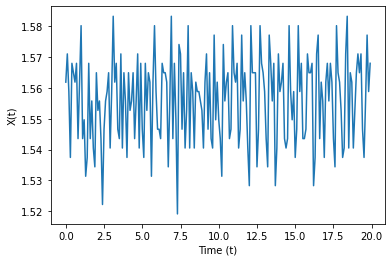

In [207]:
#np.shape(X)length
length = 200
plt.plot(T[0:length],X[0:length])
plt.xlabel('Time (t)')
plt.ylabel('X(t)')
plt.show()

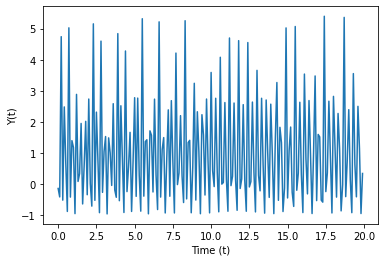

In [208]:
#np.shape(X)length
plt.plot(T[0:length],Y[0:length])
plt.xlabel('Time (t)')
plt.ylabel('Y(t)')
plt.show()

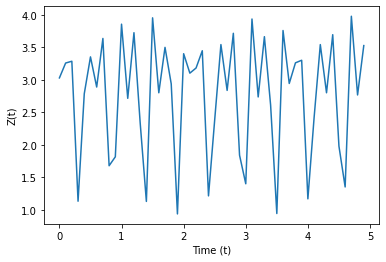

In [212]:
#np.shape(X)length
length=50
plt.plot(T[0:length],Z[0:length])
plt.xlabel('Time (t)')
plt.ylabel('Z(t)')
plt.show()

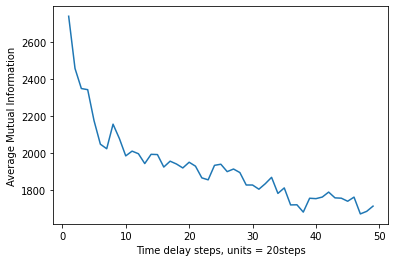

In [106]:
AMIanalysis(data, 1000, 50, 100, 20)

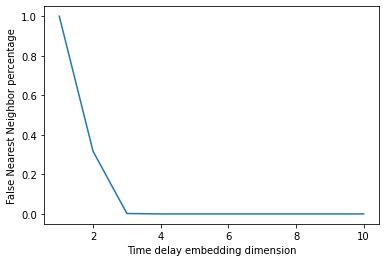

In [107]:
FNNanalysis(data, 5, 1000, 10, 10, 15)

In [108]:
results = bigAnalysis(data, 5, 60)


c:\users\lukef\appdata\local\programs\python\python39\lib\site-packages\nolds\measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
c:\users\lukef\appdata\local\programs\python\python39\lib\site-packages\nolds\measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 741
  warnings.warn(msg.format(lag), RuntimeWarning)


In [97]:
def resultsPrint(results):
    shape = np.shape(results)
    attributes = [" Rosenstein maximal lyapunov exponent "," Eckman lyapunov spectrum "," Sample Entropy "," Hurst Exponent "," Correlation Dimension "," Detrended Fluctuation Analysis "]
    #attributes.append(" Rosenstein maximal lyapunov exponent ")
    #attributes.append(" Eckman lyapunov spectrum ")
    #attributes.append(" Sample Entropy ")
    #attributes.append(" Hurst Exponent ")
    #attributes.append(" Correlation Dimension ")
    #attributes.append(" Detrended Fluctuation Analysis ")
    #attributes[1] = " Eckman lyapunov spectrum "
    #resultVec = [lyap_r, lyap_e, sampleEntropy, hurstExponent, corrDim, detrFluctAnalysis]
    #attributes[2] = " Sample Entropy "
    #attributes[3] = " Hurst Exponent "
    #attributes[4] = " Correlation Dimension "
    #attirbutes[5] = " Detrended Fluctuation Analysis "
    for i in range(shape[0]):
        sentence = attributes[i] + ": " + str(results[i])
        print(sentence)

In [109]:
resultsPrint(results)

 Rosenstein maximal lyapunov exponent : -2.5768638330664827e-05
 Eckman lyapunov spectrum : [ 0.00375393  0.00097735 -0.00141776 -0.00464688 -0.01175682]
 Sample Entropy : 0.36819972670275636
 Hurst Exponent : 0.21546054534804793
 Correlation Dimension : 1.882539300618156
 Detrended Fluctuation Analysis : 0.35384419616084445


c:\users\lukef\appdata\local\programs\python\python39\lib\site-packages\numpy\core\fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [118]:
def logisticSet(L, r0, dR, nR):
    shape = (L, nR)
    arr = np.empty(shape)
    for i in range(shape[1]):
        lm = nolds.logistic_map(0.1, L, r=(r0+dR*i)) 
        #logistic map f(x) = rx - rx^2
        x = np.fromiter(lm, dtype="float32") 
        arr[:,i] = x
    return arr

In [166]:
logisticFull = logisticSet(1000, 2, .2, 11)

In [171]:
np.shape(logisticFull)

(1000, 11)

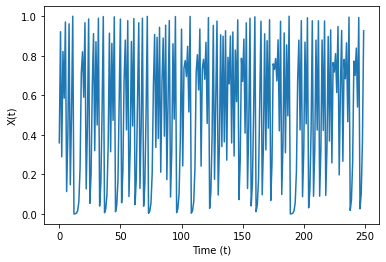

In [190]:
#np.shape(X)
t=np.linspace(0, 999, 1000)#np.linspace(0, 10, 1000)
tCut = t[0:250]
plt.plot(tCut, logisticFull[0:250,10])
plt.xlabel('Time (t)')
plt.ylabel('X(t)')
plt.show()

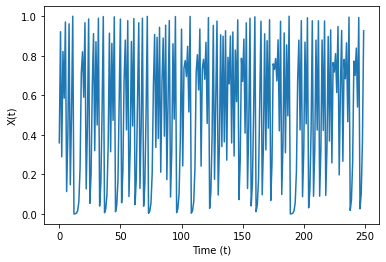

In [195]:
#np.shape(X)
t=np.linspace(0, 999, 1000)#np.linspace(0, 10, 1000)
tCut = t[0:250]
plt.plot(tCut, logisticFull[0:250,10])
plt.xlabel('Time (t)')
plt.ylabel('X(t)')
plt.show()

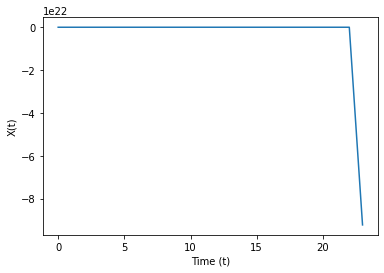

In [122]:
t=np.linspace(0, 299, 300)#np.linspace(0, 10, 1000)
plt.plot(t, logisticFull[:,11])
plt.xlabel('Time (t)')
plt.ylabel('X(t)')
plt.show()

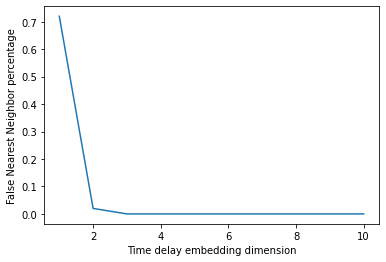

In [144]:
#AMIanalysis(logisticFull[:,9], 100, 15, 100, 10)
#seems like results from high chaos case are tau=60
#FNNanalysis(logisticFull[:,9], 5, 100, 10, 10, 15)
#emb_dim = 3

In [167]:
def logisticSequence(data):
    #bigAnalysis(data, 5, 60)
    shape = np.shape(data)
    attDim = 6
    resultShape = (shape[1], attDim)
    arr = np.empty(resultShape)
    for i in range(shape[1]):
        res = bigAnalysis(data[:,i], 3, 60)
        max_lyap_eckman = np.max(res[1])
        for j in range(attDim):
            if(j==1):
                arr[i,j] = max_lyap_eckman
            else:
                arr[i,j] = res[j]
    return arr

In [168]:
resultSet = logisticSequence(logisticFull)

c:\users\lukef\appdata\local\programs\python\python39\lib\site-packages\nolds\measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 250
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
c:\users\lukef\appdata\local\programs\python\python39\lib\site-packages\nolds\measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 230
  warnings.warn(msg.format(lag), RuntimeWarning)
c:\users\lukef\appdata\local\programs\python\python39\lib\site-packages\nolds\measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 250
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
c:\users\lukef\appdata\local\programs\python\python39\lib\site-packages\nolds\measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 230
  warnings.warn(msg.format(lag), RuntimeWarning)
c:\users\lukef\appdata\local\programs\python\python39\lib\site-packages\nolds\

In [178]:
np.shape(resultSet)
#np.linspace(2,4,11)

(11, 6)

In [173]:
def resultPlot(results, attribute,r0, dR, nR, attName):
    indepVar = np.linspace(r0, (r0+dR*nR), nR+1)
    depVar = results[:, attribute]
    plt.plot(indepVar, depVar)
    plt.xlabel("logistic parameter r")
    plt.ylabel(attName)
    plt.show()

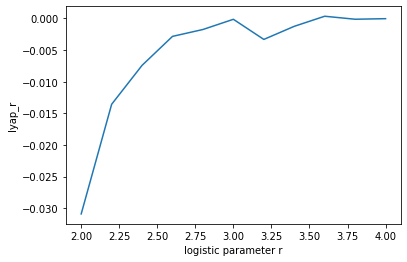

In [174]:
resultPlot(resultSet, 0, 2, .2, 10, "lyap_r")

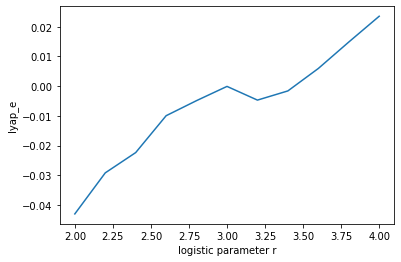

In [175]:
resultPlot(resultSet, 1, 2, .2, 10, "lyap_e")

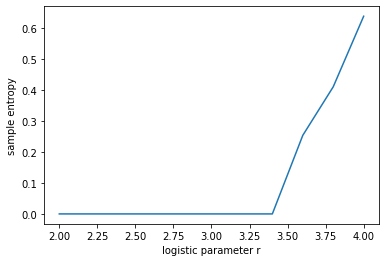

In [176]:
resultPlot(resultSet, 2, 2, .2, 10, "sample entropy")

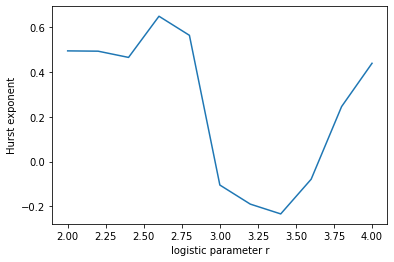

In [177]:
resultPlot(resultSet, 3, 2, .2, 10, "Hurst exponent")

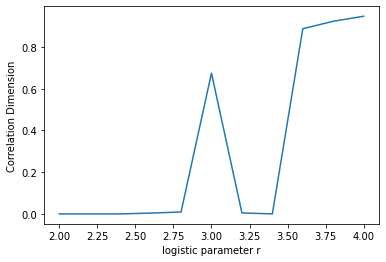

In [179]:
resultPlot(resultSet, 4, 2, .2, 10, "Correlation Dimension")

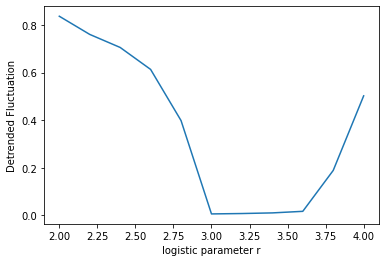

In [180]:
resultPlot(resultSet, 5, 2, .2, 10, "Detrended Fluctuation")

In [ ]:
#resultPlot(resultSet, 6, 2, .2, 10, "Hurst exponent")

In [ ]:
#return: an estimate of the largest Lyapunov exponent (a positive exponent is a strong indicator for chaos)
# return: array of matrix_dim Lyapunov exponents (positive exponents are indicators for chaos)
#return the sample entropy of the data (negative logarithm of ratio between similar template vectors of length emb_dim + 1 and emb_dim)
# return: estimated Hurst exponent K using a rescaled range approach (if K = 0.5 there are no long-range correlations in the data, if K < 0.5 there are negative long-range 
#correlations, if K > 0.5 there are positive long-range correlations)
# return: correlation dimension as slope of the line fitted to log(r) vs log(C(r))
#return: the estimate alpha for the Hurst parameter (alpha < 1: stationary process similar to fractional Gaussian noise with H = alpha, alpha > 1: non-stationary process 
#similar to fractional Brownian motion with H = alpha - 1)

In [ ]:
t=np.linspace(0, 299, 300)#np.linspace(0, 10, 1000)
plt.plot(t, logisticFull[:,11])
plt.xlabel('Time (t)')
plt.ylabel('X(t)')
plt.show()

In [ ]:
#gonna test out a linear system


In [ ]:
def pen(y, t, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt

b = 0.25
c = 5.0

y0 = [np.pi - 0.1, 0.0]

t = np.linspace(0, 10, 101)

sol = odeint(pend, y0, t, args=(b, c))

plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.plot(t, sol[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

In [52]:
def Lin(X, t, a, b):
    x = X
    dXdt = -a*x
    return dXdt

In [45]:
a = 1
b = 0
X0 = [1]
t = np.linspace(0, 10, 101)

In [46]:
arguments = (a, b)

In [53]:
sol = odeint(Lin, X0, t, args=arguments)

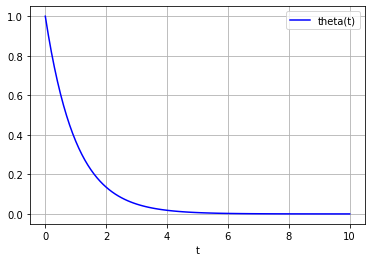

In [54]:
plt.plot(t, sol, 'b', label='theta(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

In [ ]:
#models below here are more suited to simply linear analysis
#namely autoregressive, fourier, wavelet

In [ ]:
#Autoregressive Models

import numpy as np
import statsmodels.tsa.ar_model as sm_ar
import scipy.stats as stats

def classify_ts(ts):
    # Fit an autoregressive model to the time series
    model = sm_ar.AR(ts).fit()
    
    # Use the Ljung-Box test to check for autocorrelation in the residuals
    _, p_value, _, _ = stats.acorr_ljungbox(model.resid, lags=1)
    
    # If the p-value is less than a significance level (e.g. 0.05), then the residuals are considered autocorrelated
    # This suggests that the underlying dynamics of the time series are nonlinear
    if p_value < 0.05:
        return "nonlinear"
    else:
        return "linear"

# Example usage:
ts = np.random.randn(100)  # Generate a random time series
classification = classify_ts(ts)
print("Classification:", classification)


In [ ]:
#Fourier Analysis

import numpy as np
import matplotlib.pyplot as plt

def classify_ts(ts):
    # Compute the Fourier transform of the time series
    ft = np.fft.fft(ts)
    # Compute the magnitude of the Fourier transform
    ft_magnitude = np.abs(ft)
    # Plot the magnitude of the Fourier transform
    plt.plot(ft_magnitude)
    plt.show()
    # If the Fourier transform has a simple spectral content, then the time series is considered linear
    if np.mean(ft_magnitude) < 1.0:
        return "linear"
    else:
        return "nonlinear"

# Example usage:
ts = np.random.randn(100)  # Generate a random time series
classification = classify_ts(ts)
print("Classification:", classification)


In [ ]:
#Wavelet Analysis

import numpy as np
import pywt
import matplotlib.pyplot as plt

def classify_ts(ts):
    # Compute the wavelet transform of the time series
    cwtmatr, freqs = pywt.cwt(ts, np.arange(1, 100), 'morl')
    # Compute the mean absolute value of the wavelet coefficients
    mean_abs_cwt = np.mean(np.abs(cwtmatr))
    # Plot the wavelet transform
    plt.imshow(np.abs(cwtmatr), extent=[0, 100, 1, 100], cmap='PRGn', aspect='auto', vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
    plt.show()
    # If the mean absolute value of the wavelet coefficients is small, then the time series is considered linear
    if mean_abs_cwt < 1.0:
        return "linear"
    else:
        return "nonlinear"

# Example usage:
ts = np.random.randn(100)  # Generate a random time series
classification = classify_ts(ts)
print("Classification:", classification)


In [16]:
#dynamic time warping example
import pypi

ModuleNotFoundError: No module named 'pypi'

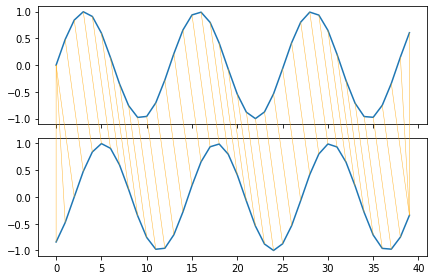

In [17]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import random
import numpy as np
x = np.arange(0, 20, .5)
s1 = np.sin(x)
s2 = np.sin(x - 1)
path = dtw.warping_path(s1, s2)
dtwvis.plot_warping(s1, s2, path)
distance = dtw.distance(s1, s2)

(<Figure size 720x720 with 4 Axes>,
 [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>])

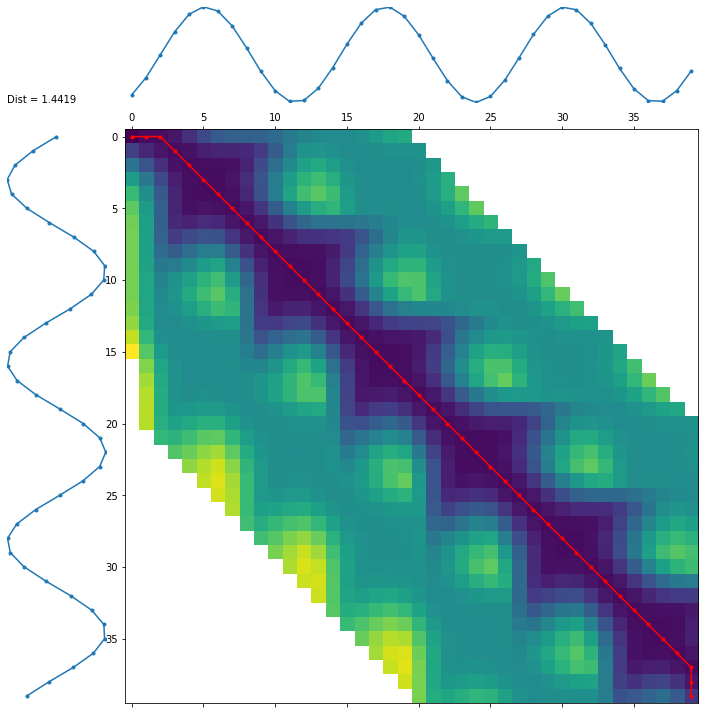

In [18]:
d, paths = dtw.warping_paths(s1, s2, window=20, use_pruning=True )
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(s1, s2, paths, best_path)

In [ ]:
##real life scenario
#
#

In [19]:
x_train_file = open(r'UCI HAR Dataset/train/X_train.txt', 'r')
y_train_file = open(r'UCI HAR Dataset/train/y_train.txt', 'r')
x_test_file = open(r'UCI HAR Dataset/test/X_test.txt', 'r')
y_test_file = open(r'UCI HAR Dataset/test/y_test.txt', 'r')
# Create empty lists
x_train = []
y_train = []
x_test = []
y_test = []
# Mapping table for classes
labels = {1:'WALKING', 2:'WALKING UPSTAIRS', 3:'WALKING DOWNSTAIRS',
          4:'SITTING', 5:'STANDING', 6:'LAYING'}
# Loop through datasets
for x in x_train_file:
    x_train.append([float(ts) for ts in x.split()])
    
for y in y_train_file:
    y_train.append(int(y.rstrip('\n')))
    
for x in x_test_file:
    x_test.append([float(ts) for ts in x.split()])
    
for y in y_test_file:
    y_test.append(int(y.rstrip('\n')))
    
# Convert to numpy for efficiency
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
colors = ['#D62728','#2C9F2C','#FD7F23','#1F77B4','#9467BD',
          '#8C564A','#7F7F7F','#1FBECF','#E377C2','#BCBD27']

FileNotFoundError: [Errno 2] No such file or directory: 'UCI HAR Dataset/train/X_train.txt'

In [24]:
%%time
idx=0
for r in range(len(x_test)):
    distance = dtw.distance(x_train[idx], x_test[r], window=20, use_pruning='True')

for r in range(len(x_test)):
    distance = dtw.distance(x_train[idx], x_test[r])


NameError: name 'x_test' is not defined

In [22]:
# function that takes as input the number of neigbors of KNN and the # index of the time series in the test set, and returns one of the 
# labels: WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, 
# STANDING, LAYING
def classifyNN(k:int, idx:int) -> str:
    
    idxs=range(0,x_train.shape[0])
    n=x_train.shape[0]
    distances=[]
    counters={}
    c=1;
    max_value=0
for r in range(n):
        distances.append(dtw.distance(x_test[idx], x_train[idxs[r]],window=10,use_pruning=True))
NN=sorted(range(len(distances)), key=lambda i: distances[i], reverse=False)[:k]
    
    for l in labels.values():
        counters[l]=0
for r in NN:
        l=labels[y_train[r]]
        counters[l]+=1
        if (counters[l])>max_value:
            max_value=counters[l]
        #print('NN(%d) has label %s' % (c,l))
        c+=1
    
    # find the label(s) with the highest frequency
    keys = [k for k in counters if counters[k] == max_value]
    
    # in case of a tie, return one at random
    return (sample(keys,1)[0])

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 27)

In [23]:
k=20
idx=3
plt.plot(x_test[idx], label=labels[y_test[idx]], color=colors[y_test[idx]-1], linewidth=2)
plt.xlabel('Samples @50Hz')
plt.legend(loc='upper left')
plt.tight_layout()

NameError: name 'x_test' is not defined

In [ ]:
k=20
idx=200
plt.plot(x_test[idx], label=labels[y_test[idx]], color=colors[y_test[idx]-1], linewidth=2)
plt.xlabel('Samples @50Hz')
plt.legend(loc='upper left')
plt.tight_layout()

In [ ]:
k=20
idx=401
plt.plot(x_test[idx], label=labels[y_test[idx]], color=colors[y_test[idx]-1], linewidth=2)
plt.xlabel('Samples @50Hz')
plt.legend(loc='upper left')
plt.tight_layout()